In [1]:
import pandas as pd
import numpy as np
from math import *
from random import *
import datetime as datetime
import matplotlib.pyplot as plt
import math
from numpy import unravel_index
from PointProcess import PointProcessTrain
from PointProcess import PointProcessRun
from wasserstein import Cluster
from numpy import array

In [2]:
fields = ['XCOORD', 'YCOORD', 'CALL_TYPE_FINAL_D', 'CALL_TYPE_FINAL', 'DATE_TIME']
full_data = pd.read_csv('FixedLatLongTimeLoc_AndTimeSorted.csv', usecols=fields)
full_data['DATE_TIME'] =  pd.to_datetime(full_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')
full_data = full_data.sort_values(by='DATE_TIME')
save_loc = 'Trained_Params_70_50_day2.npz'

In [3]:
end = len(full_data)- 90000
start = end-750000
data = full_data[start:end]
data.reset_index(drop=True, inplace=True)
#reasonable results
#all_events = PointProcessTrain(data, w = [.14, 1, .03],final_param_save_loc = save_loc, xgridsize = 70, ygridsize = 50) 
all_events = PointProcessTrain(data, w = [1, .14, .033],final_param_save_loc = save_loc, xgridsize = 70, ygridsize = 50, lam_memory=1000) 



In [8]:
all_events.train()

0.25 percent trained
0.5 percent trained
0.75 percent trained
1.0 percent trained
1.25 percent trained
1.5 percent trained
1.7500000000000002 percent trained
2.0 percent trained
2.25 percent trained
2.5 percent trained
2.75 percent trained
3.0 percent trained
3.25 percent trained
3.5000000000000004 percent trained
3.75 percent trained
4.0 percent trained
4.25 percent trained
4.5 percent trained
4.75 percent trained
5.0 percent trained
5.25 percent trained
5.5 percent trained
5.75 percent trained
6.0 percent trained
6.25 percent trained
6.5 percent trained
6.75 percent trained
7.000000000000001 percent trained
7.249999999999999 percent trained
7.5 percent trained
7.75 percent trained
8.0 percent trained
8.25 percent trained
8.5 percent trained
8.75 percent trained
9.0 percent trained
9.25 percent trained
9.5 percent trained
9.75 percent trained
10.0 percent trained
10.25 percent trained
10.5 percent trained
10.75 percent trained
11.0 percent trained
11.25 percent trained
11.5 percent tr

90.75 percent trained
91.0 percent trained
91.25 percent trained
91.5 percent trained
91.75 percent trained
92.0 percent trained
92.25 percent trained
92.5 percent trained
92.75 percent trained
93.0 percent trained
93.25 percent trained
93.5 percent trained
93.75 percent trained
94.0 percent trained
94.25 percent trained
94.5 percent trained
94.75 percent trained
95.0 percent trained
95.25 percent trained
95.5 percent trained
95.75 percent trained
96.0 percent trained
96.25 percent trained
96.5 percent trained
96.75 percent trained
97.0 percent trained
97.25 percent trained
97.5 percent trained
97.75 percent trained
98.0 percent trained
98.25 percent trained
98.5 percent trained
98.75 percent trained
99.0 percent trained
99.25 percent trained
99.5 percent trained
99.75 percent trained


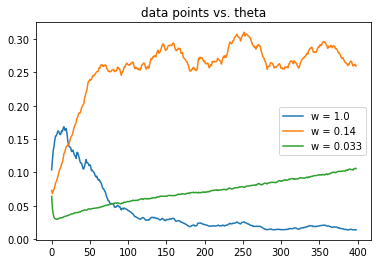


Sum of background rates w/o negative values: 287.4608581026671


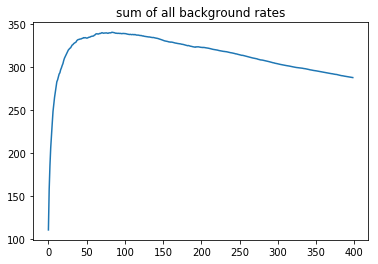

Hour vector sum: 
0.999999999999999
Day vector sum: 
1.0000000000000007

Hour vector: 
[0.00410055 0.00182019 0.0019747  0.00860027 0.00353598 0.00697735
 0.00319257 0.00326058 0.00565817 0.00574569 0.00424447 0.00589286
 0.00361831 0.00400566 0.00027622 0.00506545 0.00015494 0.00406135
 0.00395961 0.00243167 0.00581284 0.00143729 0.00291351 0.00231626
 0.00607448 0.00460727 0.0027839  0.00368462 0.00619203 0.00626818
 0.00395726 0.00650509 0.00066529 0.00621616 0.01051864 0.01117792
 0.00517871 0.00945907 0.00944056 0.01239258 0.00643016 0.00635664
 0.0049856  0.01648724 0.0122702  0.01439781 0.01251898 0.01257245
 0.0094868  0.01524397 0.00551072 0.01428268 0.02084051 0.00439919
 0.01072187 0.01691668 0.02636128 0.02063956 0.01922484 0.01746502
 0.01647304 0.00805468 0.0151747  0.01009673 0.01523964 0.02369762
 0.01403781 0.01327146 0.02465224 0.01505529 0.01527832 0.02008334
 0.02542205 0.01551366 0.02470851 0.01777799 0.02260995 0.00686818
 0.02151129 0.02271278 0.03159696 0.017318

In [9]:
all_events.param_examine()

In [10]:
all_events.model_hotspot_examine(1000)

Location and value of largest and smallest sum(Lambda): 
35.27662882839522 (27, 23) 0.0 (0, 0)

Location and value of largest and smallest (final) background rate: 
0.4545684526698533 (27, 23) 0.0 (0, 0)

Location of grid with most events:
16.0 (27, 23)

Historical time period is 3.4761188976 days

Trained hotspots in real top 10
Grid: (27, 23), Model: 11.772045040356383, Real: 16
Grid: (27, 24), Model: 10.154148464452785, Real: 8
Grid: (27, 22), Model: 10.141682781166965, Real: 8
Grid: (28, 23), Model: 9.612760080636617, Real: 15
Grid: (26, 23), Model: 7.892653583658985, Real: 7
Grid: (28, 24), Model: 7.385288127772541, Real: 11
Grid: (37, 23), Model: 6.894249756462976, Real: 8

Trained hotstpots not in real top 10
Grid: (26, 22), Model: 10.981242844803582, Real: 6
Grid: (27, 31), Model: 7.344467091898758, Real: 5
Grid: (34, 24), Model: 6.691213988230496, Real: 3

Real top 10 hotspots not in trained model
Grid: (33, 1), Model: 6.376631020344263, Real: 8
Grid: (32, 25), Model: 6.675929

#### Testing Projections w/Simulation

In [ ]:
simulation = PointProcessRun(param_location = save_loc, save_loc = 'PPtesting.npz')

test_points = full_data[end:end+1000]
test_points.reset_index(drop=True,inplace=True)
ints,ig,pred,ig,ig,ig,ig,=simulation.test_projection(test_points, num_hotspots = 30, num_simulation_iters = 100)


Predicting over time of 3.5101814739 days. Generating 337 intensity prediction(s)
Events will be projected until 3.5104166666666665 days from now


In [5]:
simulation = PointProcessRun(param_location = save_loc, save_loc = 'PPtesting.npz')

test_points = full_data[end:end+50]
test_points.reset_index(drop=True,inplace=True)
ints,ig,pred,ig,ig,ig,ig,=simulation.test_projection(test_points, num_hotspots = 30, use_simulation=False)


Predicting over time of 0.17795178749999999 days. Generating 18 intensity prediction(s)
5.0

The predictive accuracy index for 30 hotspots is: 11.666666666666666. 
Hit number/Tot number: 0.1. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 31.532028661911223

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.11701350515667497, Real: 1.0
Grid: (34, 24), Model: 0.06860657650596011, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.12740132046911642, Real: 0.0
Grid: (26, 22), Model: 0.10919027608393991, Real: 0.0
Grid: (27, 22), Model: 0.10372656545151497, Real: 0.0
Grid: (27, 24), Model: 0.09821723361805372, Real: 0.0
Grid: (28, 24), Model: 0.0849336798972651, Real: 0.0
Grid: (26, 23), Model: 0.07979211552602551, Real: 0.0
Grid: (37, 23), Model: 0.0767813749799679, Real: 0.0
Grid: (27, 31), Model: 0.07474196333297999, Real: 0.0
Grid: (32, 25), Model: 0.07114452902562815, Real: 0.0
Grid: (33, 1), Model: 0.06647073315970875, Re

#### Lets get results

In [6]:
simulation = PointProcessRun(param_location = save_loc, save_loc = 'PPtesting.npz')

In [7]:
last_t = simulation._LastTime
indices = []
for i in range(end, len(full_data)-1):
    if (full_data.DATE_TIME[i] - last_t).total_seconds() > 3600: # 1 hour in seconds
        last_t = full_data.DATE_TIME[i]
        indices.append(i)
        
pred_num_1h = []
real_num_1h = []
pai_1h = []
for i in range(0, 60):
    test_points = full_data[indices[i]:indices[i+1]]
    test_points.reset_index(drop=True, inplace=True)
    ig, ig, pred, ig, real, ig, pai = simulation.test_projection(test_points, num_hotspots=30, top_percent=0)
    pred_num_1h.append(sum(sum(pred)))
    real_num_1h.append(sum(sum(real)))
    pai_1h.append(pai)
    test_points.to_csv('for_results.csv')
    simulation.update_from_new_inputs(test_points)


Predicting over time of 0.0396528666 days. Generating 4 intensity prediction(s)
Events will be projected until 0.041666666666666664 days from now
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
0.0

The predictive accuracy index for 30 hotspots is: 0.0. 
Hit number/Tot number: 0.0. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 13.562957175752533

Predicted hotspots in real top 30

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.0548023358809943, Real: 0.0
Grid: (28, 23), Model: 0.050334241975110924, Real: 0.0
Grid: (26, 22), Model: 0.04696842744753507, Real: 0.0
Grid: (27, 22), Model: 0.04461814684137284, Real: 0.0
Grid: (27, 24), Model: 0.04224806674059618, Real: 0.0
Grid: (28, 24), Model: 0.03653460847244365, Real: 0.0
Grid: (26, 23), Model: 0.03432275412247186, Real: 0.0
Grid: (37, 23), Model: 0.033027687339371684, Real: 0.0
Grid: (27, 31), Model: 0.03215015624176447, Real: 0.0
Grid: (32, 25), Model: 0.030602780548118793, Real: 0.0
G

/home/march/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value



Predicting over time of 0.027777839999999998 days. Generating 3 intensity prediction(s)
Events will be projected until 0.03125 days from now
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
1.0

The predictive accuracy index for 30 hotspots is: 10.606060606060606. 
Hit number/Tot number: 0.09090909090909091. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 1.0058899350156312

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.003712745768442941, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.0040456380647896925, Real: 0.0
Grid: (26, 22), Model: 0.003468853355831013, Real: 0.0
Grid: (27, 22), Model: 0.003295516330453996, Real: 0.0
Grid: (27, 24), Model: 0.003122104472131765, Real: 0.0
Grid: (28, 24), Model: 0.0026961186195459336, Real: 0.0
Grid: (26, 23), Model: 0.0025349821426384625, Real: 0.0
Grid: (37, 23), Model: 0.0024379015428086463, Real: 0.0
Grid: (27, 31), Model: 0.0023754539139195646, Real: 0.0
Grid: (32, 

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
0.0

The predictive accuracy index for 30 hotspots is: 0.0. 
Hit number/Tot number: 0.0. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 1.6634748520483622

Predicted hotspots in real top 30

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.006590219432296063, Real: 0.0
Grid: (28, 23), Model: 0.006243454335992299, Real: 0.0
Grid: (26, 22), Model: 0.005660530604052735, Real: 0.0
Grid: (27, 22), Model: 0.005379243552915049, Real: 0.0
Grid: (27, 24), Model: 0.005106512444478099, Real: 0.0
Grid: (28, 24), Model: 0.0043862836984859665, Real: 0.0
Grid: (26, 23), Model: 0.004137060247753533, Real: 0.0
Grid: (37, 23), Model: 0.003970024421482997, Real: 0.0
Grid: (27, 31), Model: 0.0038828477517031347, Real: 0.0
Grid: (34, 24), Model: 0.0037836652791629496, Real: 0.0
Grid: (32, 25), Model: 0.0036933657700041166, Real: 0.0
Grid: (33, 1), Model: 0.003669918377027697, Real: 0.0
Grid: (35, 32), Model


Predicting over time of 0.041562593099999996 days. Generating 4 intensity prediction(s)
Events will be projected until 0.041666666666666664 days from now
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
1.0

The predictive accuracy index for 30 hotspots is: 14.583333333333332. 
Hit number/Tot number: 0.125. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 4.58975882189167

Predicted hotspots in real top 30
Grid: (35, 32), Model: 0.008885166631150554, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.01795881142581128, Real: 0.0
Grid: (28, 23), Model: 0.01695913314631202, Real: 0.0
Grid: (26, 22), Model: 0.016679351593639005, Real: 0.0
Grid: (27, 22), Model: 0.014682304530260508, Real: 0.0
Grid: (27, 24), Model: 0.01455970777100489, Real: 0.0
Grid: (28, 24), Model: 0.01194252656620678, Real: 0.0
Grid: (37, 23), Model: 0.011434864979869928, Real: 0.0
Grid: (26, 23), Model: 0.011290046320346392, Real: 0.0
Grid: (34, 24), Model: 0.0109

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
1.0

The predictive accuracy index for 30 hotspots is: 7.777777777777778. 
Hit number/Tot number: 0.06666666666666667. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 8.707805173034824

Predicted hotspots in real top 30
Grid: (27, 22), Model: 0.02752984972073798, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.03591257953056203, Real: 0.0
Grid: (28, 23), Model: 0.031650906426479566, Real: 0.0
Grid: (26, 22), Model: 0.03118928630221137, Real: 0.0
Grid: (27, 24), Model: 0.027301487555577875, Real: 0.0
Grid: (28, 24), Model: 0.02234002726325022, Real: 0.0
Grid: (37, 23), Model: 0.02137019958203867, Real: 0.0
Grid: (26, 23), Model: 0.021165624593847528, Real: 0.0
Grid: (33, 1), Model: 0.021049922266219545, Real: 0.0
Grid: (34, 24), Model: 0.020455307706561798, Real: 0.0
Grid: (27, 31), Model: 0.019916355793553994, Real: 0.0
Grid: (32, 25), Model: 0.018928387671592023, Real: 0.0
Grid: (35,


Predicting over time of 0.0412732406 days. Generating 4 intensity prediction(s)
Events will be projected until 0.041666666666666664 days from now
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
3.0

The predictive accuracy index for 30 hotspots is: 21.875. 
Hit number/Tot number: 0.1875. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 16.479232409074786

Predicted hotspots in real top 30
Grid: (27, 23), Model: 0.06680528185336251, Real: 1.0
Grid: (28, 23), Model: 0.05883526839544195, Real: 2.0

Predicted hotstpots not in real top 30
Grid: (26, 22), Model: 0.05808024669220671, Real: 0.0
Grid: (27, 22), Model: 0.05353236492397735, Real: 0.0
Grid: (27, 24), Model: 0.053173300990641804, Real: 0.0
Grid: (33, 1), Model: 0.043452506988025864, Real: 0.0
Grid: (28, 24), Model: 0.0416153770417514, Real: 0.0
Grid: (37, 23), Model: 0.039777803309399104, Real: 0.0
Grid: (26, 23), Model: 0.03950296106103146, Real: 0.0
Grid: (34, 24), Model: 0.03810660401875636, Rea

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
0.0

The predictive accuracy index for 30 hotspots is: 0.0. 
Hit number/Tot number: 0.0. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 23.41851427879688

Predicted hotspots in real top 30

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.10269182804662706, Real: 0.0
Grid: (28, 23), Model: 0.08827167254858825, Real: 0.0
Grid: (26, 22), Model: 0.0812602303916736, Real: 0.0
Grid: (27, 24), Model: 0.07758321681998154, Real: 0.0
Grid: (27, 22), Model: 0.074960501109038, Real: 0.0
Grid: (33, 1), Model: 0.06361126671039276, Real: 0.0
Grid: (28, 24), Model: 0.058241113208776986, Real: 0.0
Grid: (37, 23), Model: 0.05563607541109768, Real: 0.0
Grid: (26, 23), Model: 0.05537145832387169, Real: 0.0
Grid: (34, 24), Model: 0.053337831233330114, Real: 0.0
Grid: (27, 31), Model: 0.052225476311751895, Real: 0.0
Grid: (32, 25), Model: 0.04959981247951605, Real: 0.0
Grid: (35, 32), Model: 0.04671933132493949, Rea

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
0.0

The predictive accuracy index for 30 hotspots is: 0.0. 
Hit number/Tot number: 0.0. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 10.9109856120527

Predicted hotspots in real top 30

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.04972969425744918, Real: 0.0
Grid: (28, 23), Model: 0.04319491150426334, Real: 0.0
Grid: (27, 24), Model: 0.03841282521178195, Real: 0.0
Grid: (26, 22), Model: 0.037268715694428564, Real: 0.0
Grid: (27, 22), Model: 0.034413855799982455, Real: 0.0
Grid: (33, 1), Model: 0.028974522657417942, Real: 0.0
Grid: (28, 24), Model: 0.02672075498168651, Real: 0.0
Grid: (34, 24), Model: 0.025921529473418088, Real: 0.0
Grid: (37, 23), Model: 0.02550939928069658, Real: 0.0
Grid: (26, 23), Model: 0.025449987894489788, Real: 0.0
Grid: (27, 31), Model: 0.024037235282797484, Real: 0.0
Grid: (32, 25), Model: 0.022819865360567914, Real: 0.0
Grid: (35, 32), Model: 0.0214888882741477

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
3.0

The predictive accuracy index for 30 hotspots is: 29.166666666666664. 
Hit number/Tot number: 0.25. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 10.414136503508725

Predicted hotspots in real top 30
Grid: (32, 25), Model: 0.021587966898646116, Real: 2.0
Grid: (34, 18), Model: 0.01823053354910371, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.046692345904790926, Real: 0.0
Grid: (28, 23), Model: 0.04054963142283281, Real: 0.0
Grid: (27, 24), Model: 0.03615202264430547, Real: 0.0
Grid: (26, 22), Model: 0.03516792380185919, Real: 0.0
Grid: (27, 22), Model: 0.03249986817685335, Real: 0.0
Grid: (33, 1), Model: 0.027195932572129926, Real: 0.0
Grid: (26, 23), Model: 0.02545433398143487, Real: 0.0
Grid: (28, 24), Model: 0.02522175796620488, Real: 0.0
Grid: (34, 24), Model: 0.024431250738342975, Real: 0.0
Grid: (27, 31), Model: 0.024138464596998872, Real: 0.0
Grid: (37, 23), Model: 0.

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
2.0

The predictive accuracy index for 30 hotspots is: 38.888888888888886. 
Hit number/Tot number: 0.3333333333333333. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 4.449901778742372

Predicted hotspots in real top 30
Grid: (29, 22), Model: 0.007775328712958226, Real: 1.0
Grid: (41, 26), Model: 0.007686598610315081, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.01965576206798667, Real: 0.0
Grid: (28, 23), Model: 0.017664062166596994, Real: 0.0
Grid: (27, 24), Model: 0.015849196357172912, Real: 0.0
Grid: (26, 22), Model: 0.014872949844544668, Real: 0.0
Grid: (27, 22), Model: 0.013754829858579521, Real: 0.0
Grid: (33, 1), Model: 0.011445873945841123, Real: 0.0
Grid: (26, 23), Model: 0.010760957727727588, Real: 0.0
Grid: (28, 24), Model: 0.010669510485461648, Real: 0.0
Grid: (34, 24), Model: 0.01032220332389766, Real: 0.0
Grid: (32, 25), Model: 0.010312992976414689, Real: 0.0
Grid: (

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
2.0

The predictive accuracy index for 30 hotspots is: 38.888888888888886. 
Hit number/Tot number: 0.3333333333333333. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 3.8538260289911017

Predicted hotspots in real top 30
Grid: (26, 27), Model: 0.006595024896945523, Real: 1.0
Grid: (32, 31), Model: 0.006539427476114942, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.016792690035510757, Real: 0.0
Grid: (28, 23), Model: 0.015073372190095056, Real: 0.0
Grid: (26, 22), Model: 0.013795406156582805, Real: 0.0
Grid: (27, 24), Model: 0.013554961573176429, Real: 0.0
Grid: (27, 22), Model: 0.011813169781345983, Real: 0.0
Grid: (33, 1), Model: 0.009777243878044099, Real: 0.0
Grid: (26, 23), Model: 0.009231990126445287, Real: 0.0
Grid: (28, 24), Model: 0.009159169023188704, Real: 0.0
Grid: (34, 24), Model: 0.008851270343529952, Real: 0.0
Grid: (32, 25), Model: 0.008836065998367953, Real: 0.0
G

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
1.0

The predictive accuracy index for 30 hotspots is: 10.606060606060606. 
Hit number/Tot number: 0.09090909090909091. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 8.774406908547041

Predicted hotspots in real top 30
Grid: (27, 31), Model: 0.019784084628366196, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.03770198582976505, Real: 0.0
Grid: (28, 23), Model: 0.03380912367962006, Real: 0.0
Grid: (26, 22), Model: 0.031016931039176097, Real: 0.0
Grid: (27, 24), Model: 0.030462331886493024, Real: 0.0
Grid: (27, 22), Model: 0.026639214225903138, Real: 0.0
Grid: (33, 1), Model: 0.02195012713034632, Real: 0.0
Grid: (26, 23), Model: 0.02080010009810133, Real: 0.0
Grid: (28, 24), Model: 0.02064639777463471, Real: 0.0
Grid: (34, 24), Model: 0.019935968708621746, Real: 0.0
Grid: (32, 25), Model: 0.019888011312535807, Real: 0.0
Grid: (37, 23), Model: 0.01968524930946595, Real: 0.0
Grid: (51, 33

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
6.0

The predictive accuracy index for 30 hotspots is: 38.888888888888886. 
Hit number/Tot number: 0.3333333333333333. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 10.82562789348857

Predicted hotspots in real top 30
Grid: (26, 22), Model: 0.03770475289933705, Real: 1.0
Grid: (27, 24), Model: 0.037014266827999874, Real: 1.0
Grid: (29, 22), Model: 0.01971505622485681, Real: 1.0
Grid: (27, 32), Model: 0.01961210433289018, Real: 1.0
Grid: (37, 24), Model: 0.019361994670985854, Real: 1.0
Grid: (20, 20), Model: 0.017902129085554042, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.04576205470670313, Real: 0.0
Grid: (28, 23), Model: 0.04099722510495108, Real: 0.0
Grid: (27, 22), Model: 0.03535622647301025, Real: 0.0
Grid: (33, 1), Model: 0.02664311217186483, Real: 0.0
Grid: (32, 25), Model: 0.02563697460489077, Real: 0.0
Grid: (27, 31), Model: 0.02552395145028656, Real: 0.0
Grid:

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
3.0

The predictive accuracy index for 30 hotspots is: 13.461538461538462. 
Hit number/Tot number: 0.11538461538461539. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 28.89535297116333

Predicted hotspots in real top 30
Grid: (27, 24), Model: 0.10112414441148411, Real: 1.0
Grid: (26, 27), Model: 0.05530094087874687, Real: 1.0
Grid: (33, 25), Model: 0.05291112627130888, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.12026863197026143, Real: 0.0
Grid: (28, 23), Model: 0.11541782057331947, Real: 0.0
Grid: (26, 22), Model: 0.10302486721721059, Real: 0.0
Grid: (27, 22), Model: 0.0930396107684402, Real: 0.0
Grid: (32, 25), Model: 0.0713090147174831, Real: 0.0
Grid: (33, 1), Model: 0.07002708021710496, Real: 0.0
Grid: (27, 31), Model: 0.06724253261921975, Real: 0.0
Grid: (26, 23), Model: 0.06680380594803718, Real: 0.0
Grid: (28, 24), Model: 0.06637167883173324, Real: 0.0
Grid: (34

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
1.0

The predictive accuracy index for 30 hotspots is: 8.974358974358974. 
Hit number/Tot number: 0.07692307692307693. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 22.498012473814043

Predicted hotspots in real top 30
Grid: (45, 45), Model: 0.0375143087551036, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.09695507448593174, Real: 0.0
Grid: (27, 23), Model: 0.09202113190200577, Real: 0.0
Grid: (27, 24), Model: 0.08030509473478992, Real: 0.0
Grid: (26, 22), Model: 0.0788463799764845, Real: 0.0
Grid: (27, 22), Model: 0.07128109429890207, Real: 0.0
Grid: (32, 25), Model: 0.057524013793575406, Real: 0.0
Grid: (27, 31), Model: 0.0546032861454062, Real: 0.0
Grid: (28, 24), Model: 0.053981789317563554, Real: 0.0
Grid: (33, 1), Model: 0.05358724504620108, Real: 0.0
Grid: (34, 24), Model: 0.05210637918412289, Real: 0.0
Grid: (26, 23), Model: 0.051271673188539174, Real: 0.0
Grid: (37, 23

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
3.0

The predictive accuracy index for 30 hotspots is: 23.333333333333332. 
Hit number/Tot number: 0.2. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 6.443120851703298

Predicted hotspots in real top 30
Grid: (26, 27), Model: 0.012809923839588943, Real: 2.0
Grid: (33, 25), Model: 0.012323316477629385, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.02726309001641457, Real: 0.0
Grid: (27, 23), Model: 0.026009513452503786, Real: 0.0
Grid: (27, 24), Model: 0.02354347616200755, Real: 0.0
Grid: (26, 22), Model: 0.022292633365914243, Real: 0.0
Grid: (27, 22), Model: 0.0210368452487556, Real: 0.0
Grid: (26, 23), Model: 0.01625956413687422, Real: 0.0
Grid: (32, 25), Model: 0.016222400282484232, Real: 0.0
Grid: (27, 31), Model: 0.015442025181165877, Real: 0.0
Grid: (28, 24), Model: 0.015278419093013227, Real: 0.0
Grid: (33, 1), Model: 0.015149208581187026, Real: 0.0
Grid: (34, 24), Mod

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
2.0

The predictive accuracy index for 30 hotspots is: 17.94871794871795. 
Hit number/Tot number: 0.15384615384615385. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 1.7706896959965137

Predicted hotspots in real top 30
Grid: (27, 24), Model: 0.006374768347136431, Real: 1.0
Grid: (27, 22), Model: 0.005707757642844018, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.007361277617532013, Real: 0.0
Grid: (27, 23), Model: 0.0070570565180292, Real: 0.0
Grid: (26, 22), Model: 0.006288102843397926, Real: 0.0
Grid: (27, 31), Model: 0.004429050386925165, Real: 0.0
Grid: (26, 23), Model: 0.004407805584273802, Real: 0.0
Grid: (32, 25), Model: 0.004392958678148558, Real: 0.0
Grid: (28, 24), Model: 0.004390477424653194, Real: 0.0
Grid: (33, 1), Model: 0.004111400990012768, Real: 0.0
Grid: (34, 24), Model: 0.004004945878250819, Real: 0.0
Grid: (26, 27), Model: 0.003943017549586803, Real: 0.0
Gri

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
1.0

The predictive accuracy index for 30 hotspots is: 9.722222222222221. 
Hit number/Tot number: 0.08333333333333333. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 1.6439586200811396

Predicted hotspots in real top 30
Grid: (26, 22), Model: 0.005768281229796166, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.0067299267639405955, Real: 0.0
Grid: (27, 23), Model: 0.006478611016966402, Real: 0.0
Grid: (27, 24), Model: 0.006057809389981088, Real: 0.0
Grid: (27, 22), Model: 0.005454971547343283, Real: 0.0
Grid: (27, 31), Model: 0.004062497015289096, Real: 0.0
Grid: (26, 23), Model: 0.00404400855912396, Real: 0.0
Grid: (28, 24), Model: 0.004028781649062849, Real: 0.0
Grid: (32, 25), Model: 0.004026775651281095, Real: 0.0
Grid: (33, 1), Model: 0.003775434850573148, Real: 0.0
Grid: (34, 24), Model: 0.0036810189533935723, Real: 0.0
Grid: (26, 27), Model: 0.00360915258212635, Real: 0.0
Grid: (37,

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
3.0

The predictive accuracy index for 30 hotspots is: 21.875. 
Hit number/Tot number: 0.1875. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 12.719612996980835

Predicted hotspots in real top 30
Grid: (27, 24), Model: 0.04614629313413563, Real: 1.0
Grid: (33, 1), Model: 0.02884773652025605, Real: 2.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.05118755286421902, Real: 0.0
Grid: (27, 23), Model: 0.049485283909675146, Real: 0.0
Grid: (26, 22), Model: 0.04569195927117088, Real: 0.0
Grid: (27, 22), Model: 0.0416225372265117, Real: 0.0
Grid: (27, 31), Model: 0.03100937748826385, Real: 0.0
Grid: (26, 23), Model: 0.03087383204703128, Real: 0.0
Grid: (28, 24), Model: 0.03076301375545443, Real: 0.0
Grid: (32, 25), Model: 0.03071511592389184, Real: 0.0
Grid: (34, 24), Model: 0.028155886432766324, Real: 0.0
Grid: (26, 27), Model: 0.027492329635627907, Real: 0.0
Grid: (37, 23), Model: 0.0264534


Predicting over time of 0.0412500924 days. Generating 4 intensity prediction(s)
Events will be projected until 0.041666666666666664 days from now
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
1.0

The predictive accuracy index for 30 hotspots is: 8.333333333333332. 
Hit number/Tot number: 0.07142857142857142. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 13.649961457045428

Predicted hotspots in real top 30
Grid: (33, 1), Model: 0.034118370833444996, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.05764112413972214, Real: 0.0
Grid: (27, 23), Model: 0.05235244730845043, Real: 0.0
Grid: (27, 24), Model: 0.05050268388020037, Real: 0.0
Grid: (26, 22), Model: 0.04826140306202005, Real: 0.0
Grid: (27, 22), Model: 0.0458512776320699, Real: 0.0
Grid: (27, 31), Model: 0.03279322912578066, Real: 0.0
Grid: (26, 23), Model: 0.03265278994051393, Real: 0.0
Grid: (28, 24), Model: 0.03254075016991714, Real: 0.0
Grid: (32, 25), Model: 0.032


Predicting over time of 0.0416204636 days. Generating 4 intensity prediction(s)
Events will be projected until 0.041666666666666664 days from now
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
3.0

The predictive accuracy index for 30 hotspots is: 29.166666666666664. 
Hit number/Tot number: 0.25. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 14.032681743309722

Predicted hotspots in real top 30
Grid: (26, 27), Model: 0.029393286521366146, Real: 1.0
Grid: (47, 32), Model: 0.026569649832710245, Real: 1.0
Grid: (7, 32), Model: 0.024273944565396877, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.058164255037380555, Real: 0.0
Grid: (27, 23), Model: 0.05310681335687663, Real: 0.0
Grid: (27, 24), Model: 0.05107754232889092, Real: 0.0
Grid: (26, 22), Model: 0.050747429233395785, Real: 0.0
Grid: (27, 22), Model: 0.04642285823848846, Real: 0.0
Grid: (33, 1), Model: 0.03821685073109719, Real: 0.0
Grid: (27, 31), Model: 0.0332598710107

In [8]:
#print(pred_num_1h, real_num_1h, pai_1h)
print(np.mean(pred_num_1h), np.mean(real_num_1h), np.mean(pai_1h), 
      np.median(pred_num_1h), np.median(real_num_1h), np.median(pai_1h))

10.384410562113146 13.383333333333333 19.73767914736585 8.926984880692473 13.0 16.666666666666664


In [9]:
pai_1h

[0.0,
 10.606060606060606,
 9.722222222222221,
 25.925925925925924,
 0.0,
 58.33333333333333,
 31.818181818181813,
 14.583333333333332,
 34.31372549019608,
 10.606060606060606,
 7.777777777777778,
 15.217391304347824,
 6.862745098039215,
 21.875,
 15.909090909090907,
 10.144927536231883,
 0.0,
 35.0,
 15.555555555555555,
 0.0,
 12.962962962962962,
 35.0,
 29.166666666666664,
 23.333333333333332,
 25.925925925925924,
 38.888888888888886,
 23.333333333333332,
 46.666666666666664,
 38.888888888888886,
 0.0,
 0.0,
 10.606060606060606,
 31.11111111111111,
 17.5,
 38.888888888888886,
 23.333333333333332,
 23.333333333333332,
 13.461538461538462,
 32.407407407407405,
 16.666666666666664,
 8.974358974358974,
 49.99999999999999,
 29.166666666666664,
 23.333333333333332,
 14.583333333333332,
 42.42424242424242,
 17.94871794871795,
 38.888888888888886,
 0.0,
 9.722222222222221,
 0.0,
 0.0,
 21.875,
 11.666666666666666,
 27.45098039215686,
 8.333333333333332,
 16.666666666666664,
 16.6666666666666

In [10]:
simulation = PointProcessRun(param_location = save_loc, save_loc = 'PPtesting.npz')
simulation._LastTime

Timestamp('2016-01-13 21:59:56')

In [11]:
last_t = simulation._LastTime
indices = []
for i in range(end, len(full_data)-1):
    if (full_data.DATE_TIME[i] - last_t).total_seconds() > 3600*2: # 2 hours in seconds
        last_t = full_data.DATE_TIME[i]
        indices.append(i)
        
pred_num_2h = []
real_num_2h = []
pai_2h = []
for i in range(0, 60):
    test_points = full_data[indices[i]:indices[i+1]]
    test_points.reset_index(drop=True, inplace=True)
    ig, ig, pred, ig, real, ig, pai = simulation.test_projection(test_points, num_hotspots=30, top_percent=0)
    pred_num_2h.append(sum(sum(pred)))
    real_num_2h.append(sum(sum(real)))
    pai_2h.append(pai)
    test_points.to_csv('for_results.csv')
    simulation.update_from_new_inputs(test_points)


Predicting over time of 0.0806367547 days. Generating 8 intensity prediction(s)
Events will be projected until 0.08333333333333333 days from now
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
2.0

The predictive accuracy index for 30 hotspots is: 12.962962962962962. 
Hit number/Tot number: 0.1111111111111111. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 4.628496266119002

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.017111053245810505, Real: 1.0
Grid: (34, 24), Model: 0.010050163455096314, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.01864613328387825, Real: 0.0
Grid: (26, 22), Model: 0.01598824455086916, Real: 0.0
Grid: (27, 22), Model: 0.015189396013672321, Real: 0.0
Grid: (27, 24), Model: 0.014390585527815556, Real: 0.0
Grid: (28, 24), Model: 0.01242607819842504, Real: 0.0
Grid: (26, 23), Model: 0.011683965197782056, Real: 0.0
Grid: (37, 23), Model: 0.01123618830720775, Real: 0.0
Grid: (27, 31), Model: 0.01094900352091

/home/march/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
2.0

The predictive accuracy index for 30 hotspots is: 10.144927536231883. 
Hit number/Tot number: 0.08695652173913043. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 7.675432358299566

Predicted hotspots in real top 30
Grid: (33, 1), Model: 0.01601833305677337, Real: 1.0
Grid: (34, 23), Model: 0.013137032504855432, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.030643330481116504, Real: 0.0
Grid: (28, 23), Model: 0.02907586960036737, Real: 0.0
Grid: (26, 22), Model: 0.026303296440327223, Real: 0.0
Grid: (27, 22), Model: 0.02499349580514714, Real: 0.0
Grid: (27, 24), Model: 0.0237086158547124, Real: 0.0
Grid: (28, 24), Model: 0.020404746104414343, Real: 0.0
Grid: (26, 23), Model: 0.019223332263595176, Real: 0.0
Grid: (37, 23), Model: 0.01846159916783225, Real: 0.0
Grid: (27, 31), Model: 0.018031370478903318, Real: 0.0
Grid: (34, 24), Model: 0.01758527778185503, Real: 0.0
Grid: (32, 25), M

[]
[]
[]
[]
[]
[]
[]
4.0

The predictive accuracy index for 30 hotspots is: 23.333333333333332. 
Hit number/Tot number: 0.2. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 21.08118943821152

Predicted hotspots in real top 30
Grid: (27, 23), Model: 0.08491460733579285, Real: 1.0
Grid: (33, 1), Model: 0.04569595894979599, Real: 2.0
Grid: (36, 23), Model: 0.036236139152440186, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.07739396098292405, Real: 0.0
Grid: (26, 22), Model: 0.0761836223061143, Real: 0.0
Grid: (27, 22), Model: 0.06715951133481307, Real: 0.0
Grid: (27, 24), Model: 0.06659626759123928, Real: 0.0
Grid: (28, 24), Model: 0.05456397360993581, Real: 0.0
Grid: (37, 23), Model: 0.05221560873695559, Real: 0.0
Grid: (26, 23), Model: 0.05163848393100935, Real: 0.0
Grid: (34, 24), Model: 0.04995390981854525, Real: 0.0
Grid: (27, 31), Model: 0.048557885835613636, Real: 0.0
Grid: (32, 25), Model: 0.04615900623063438, Real: 0.0
Grid

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
5.0

The predictive accuracy index for 30 hotspots is: 13.565891472868216. 
Hit number/Tot number: 0.11627906976744186. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 37.53548565128661

Predicted hotspots in real top 30
Grid: (27, 23), Model: 0.15646570538324567, Real: 2.0
Grid: (27, 24), Model: 0.12063283719986048, Real: 1.0
Grid: (33, 1), Model: 0.09830729380675561, Real: 1.0
Grid: (37, 24), Model: 0.06676046665900297, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.1433484983362836, Real: 0.0
Grid: (26, 22), Model: 0.13171892395351434, Real: 0.0
Grid: (27, 22), Model: 0.12145585291208487, Real: 0.0
Grid: (28, 24), Model: 0.09440017977345505, Real: 0.0
Grid: (37, 23), Model: 0.09020019068715206, Real: 0.0
Grid: (26, 23), Model: 0.08967322966667496, Real: 0.0
Grid: (34, 24), Model: 0.08643423087014189, Real: 0.0
Grid: (27, 31), Model: 0.08452742155606811, Real: 0.0
Grid: (32, 25), Model: 0.0802

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
2.0

The predictive accuracy index for 30 hotspots is: 12.280701754385964. 
Hit number/Tot number: 0.10526315789473684. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 29.66000537524357

Predicted hotspots in real top 30
Grid: (51, 33), Model: 0.05398411548383055, Real: 1.0
Grid: (29, 22), Model: 0.04874340631123539, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.13491286595064042, Real: 0.0
Grid: (28, 23), Model: 0.11718768741928354, Real: 0.0
Grid: (27, 24), Model: 0.10426173398353045, Real: 0.0
Grid: (26, 22), Model: 0.10122887071958644, Real: 0.0
Grid: (27, 22), Model: 0.09349196451046118, Real: 0.0
Grid: (33, 1), Model: 0.0785934290601599, Real: 0.0
Grid: (28, 24), Model: 0.07258874419006078, Real: 0.0
Grid: (34, 24), Model: 0.07038201980711505, Real: 0.0
Grid: (37, 23), Model: 0.06928746457502026, Real: 0.0
Grid: (26, 23), Model: 0.06915580716408459, Real: 0.0
Grid: (27, 31), Model: 0.0

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
3.0

The predictive accuracy index for 30 hotspots is: 38.888888888888886. 
Hit number/Tot number: 0.3333333333333333. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 4.872577963439524

Predicted hotspots in real top 30
Grid: (33, 25), Model: 0.008671657093690952, Real: 1.0
Grid: (29, 22), Model: 0.008513431742054232, Real: 1.0
Grid: (41, 26), Model: 0.008408433030358197, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.021490335114744238, Real: 0.0
Grid: (28, 23), Model: 0.019307929851781553, Real: 0.0
Grid: (27, 24), Model: 0.01733154512244483, Real: 0.0
Grid: (26, 22), Model: 0.01627946963340456, Real: 0.0
Grid: (27, 22), Model: 0.015058316560150446, Real: 0.0
Grid: (33, 1), Model: 0.012512758620005887, Real: 0.0
Grid: (26, 23), Model: 0.01177757961055053, Real: 0.0
Grid: (28, 24), Model: 0.011680032871507656, Real: 0.0
Grid: (34, 24), Model: 0.01129512948266171, Real: 0.0
Grid: (32, 25), Model

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
5.0

The predictive accuracy index for 30 hotspots is: 23.333333333333332. 
Hit number/Tot number: 0.2. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 16.03759919806659

Predicted hotspots in real top 30
Grid: (27, 22), Model: 0.048712767109867806, Real: 1.0
Grid: (32, 25), Model: 0.03635194212548076, Real: 1.0
Grid: (27, 31), Model: 0.036176724883218436, Real: 1.0
Grid: (26, 27), Model: 0.029351504572415914, Real: 1.0
Grid: (47, 32), Model: 0.028204163370753654, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.06887867905877185, Real: 0.0
Grid: (28, 23), Model: 0.06175673258971636, Real: 0.0
Grid: (26, 22), Model: 0.056681751846835556, Real: 0.0
Grid: (27, 24), Model: 0.055660221289182674, Real: 0.0
Grid: (33, 1), Model: 0.04009836591300124, Real: 0.0
Grid: (26, 23), Model: 0.038028397737946244, Real: 0.0
Grid: (28, 24), Model: 0.03775333525412057, Real: 0.0
Grid: (34, 24), Model: 0.036444015083551

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
6.0

The predictive accuracy index for 30 hotspots is: 17.94871794871795. 
Hit number/Tot number: 0.15384615384615385. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 40.562044196920944

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.156771802331483, Real: 3.0
Grid: (27, 24), Model: 0.1421834521582805, Real: 1.0
Grid: (26, 27), Model: 0.07776342015547914, Real: 1.0
Grid: (33, 25), Model: 0.07440894880514211, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.16911573426795445, Real: 0.0
Grid: (26, 22), Model: 0.14486536373055042, Real: 0.0
Grid: (27, 22), Model: 0.1308343396571351, Real: 0.0
Grid: (32, 25), Model: 0.10025819742832345, Real: 0.0
Grid: (33, 1), Model: 0.0984625171290096, Real: 0.0
Grid: (27, 31), Model: 0.09456153053971074, Real: 0.0
Grid: (26, 23), Model: 0.09395364720430535, Real: 0.0
Grid: (28, 24), Model: 0.09335255233499831, Real: 0.0
Grid: (34, 24), Model: 0.09001

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
5.0

The predictive accuracy index for 30 hotspots is: 21.604938271604937. 
Hit number/Tot number: 0.18518518518518517. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 29.593602123245105

Predicted hotspots in real top 30
Grid: (27, 24), Model: 0.10451174182581614, Real: 1.0
Grid: (26, 23), Model: 0.07090335290801343, Real: 1.0
Grid: (26, 27), Model: 0.05903304564643978, Real: 2.0
Grid: (33, 25), Model: 0.05678459420113314, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.12574133014248173, Real: 0.0
Grid: (27, 23), Model: 0.11987943087045025, Real: 0.0
Grid: (26, 22), Model: 0.10273997546977344, Real: 0.0
Grid: (27, 22), Model: 0.09695760508499465, Real: 0.0
Grid: (32, 25), Model: 0.07478571874247973, Real: 0.0
Grid: (27, 31), Model: 0.07116189735325634, Real: 0.0
Grid: (28, 24), Model: 0.07040701003297009, Real: 0.0
Grid: (33, 1), Model: 0.06981678814449896, Real: 0.0
Grid: (34, 24), Model


Predicting over time of 0.0821182395 days. Generating 8 intensity prediction(s)
Events will be projected until 0.08333333333333333 days from now
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
1.0

The predictive accuracy index for 30 hotspots is: 6.140350877192982. 
Hit number/Tot number: 0.05263157894736842. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 4.334383452079564

Predicted hotspots in real top 30
Grid: (26, 22), Model: 0.015230959583943444, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.017769799321492, Real: 0.0
Grid: (27, 23), Model: 0.01710738727115055, Real: 0.0
Grid: (27, 24), Model: 0.015994178716944103, Real: 0.0
Grid: (27, 22), Model: 0.014403521679103056, Real: 0.0
Grid: (27, 31), Model: 0.010726432621866839, Real: 0.0
Grid: (26, 23), Model: 0.010678142618628922, Real: 0.0
Grid: (28, 24), Model: 0.010656000966906417, Real: 0.0
Grid: (32, 25), Model: 0.010632067624717313, Real: 0.0
Grid: (33, 1), Model: 0.009968753

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
5.0

The predictive accuracy index for 30 hotspots is: 19.444444444444443. 
Hit number/Tot number: 0.16666666666666666. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 24.11345623150171

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.09575318677341671, Real: 2.0
Grid: (27, 22), Model: 0.07805904753864906, Real: 1.0
Grid: (33, 1), Model: 0.06054221837752917, Real: 1.0
Grid: (33, 25), Model: 0.04702740132982608, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.09287417874014578, Real: 0.0
Grid: (27, 24), Model: 0.08961544059182075, Real: 0.0
Grid: (26, 22), Model: 0.08562674390705965, Real: 0.0
Grid: (27, 31), Model: 0.05817295953423577, Real: 0.0
Grid: (26, 23), Model: 0.057926173040508296, Real: 0.0
Grid: (28, 24), Model: 0.05772810485406327, Real: 0.0
Grid: (32, 25), Model: 0.057588029706252444, Real: 0.0
Grid: (34, 24), Model: 0.05290348250552687, Real: 0.0
Grid: (26, 27), Model: 0.0514

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
4.0

The predictive accuracy index for 30 hotspots is: 21.21212121212121. 
Hit number/Tot number: 0.18181818181818182. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 37.22500581690096

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.1527514201462277, Real: 1.0
Grid: (33, 1), Model: 0.10051115999114259, Real: 1.0
Grid: (34, 24), Model: 0.0847871351356555, Real: 1.0
Grid: (37, 23), Model: 0.07539739335693413, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.1399816505556642, Real: 0.0
Grid: (27, 24), Model: 0.13456165053952845, Real: 0.0
Grid: (26, 22), Model: 0.13352107288235157, Real: 0.0
Grid: (27, 22), Model: 0.12220568943672992, Real: 0.0
Grid: (27, 31), Model: 0.08766019215552488, Real: 0.0
Grid: (26, 23), Model: 0.08728826005883486, Real: 0.0
Grid: (28, 24), Model: 0.0870135462795209, Real: 0.0
Grid: (32, 25), Model: 0.08667958545057938, Real: 0.0
Grid: (26, 27), Model: 0.08229916756

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
5.0

The predictive accuracy index for 30 hotspots is: 29.166666666666664. 
Hit number/Tot number: 0.25. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 23.03664194943251

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.09769225514362281, Real: 1.0
Grid: (34, 24), Model: 0.05420747862552333, Real: 1.0
Grid: (32, 25), Model: 0.0524116189388655, Real: 1.0
Grid: (37, 24), Model: 0.04237170847793475, Real: 1.0
Grid: (32, 31), Model: 0.04035984905360038, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.0847015595503739, Real: 0.0
Grid: (27, 24), Model: 0.0839662340990268, Real: 0.0
Grid: (26, 22), Model: 0.08050179309308877, Real: 0.0
Grid: (27, 22), Model: 0.07376662893060004, Real: 0.0
Grid: (33, 1), Model: 0.06308951799516221, Real: 0.0
Grid: (27, 31), Model: 0.056089566143286564, Real: 0.0
Grid: (28, 24), Model: 0.055727184004761635, Real: 0.0
Grid: (26, 23), Model: 0.0528259569788825

[]
[]
[]
[]
[]
[]
[]
[]
1.0

The predictive accuracy index for 30 hotspots is: 8.974358974358974. 
Hit number/Tot number: 0.07692307692307693. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 5.540382140879646

Predicted hotspots in real top 30
Grid: (44, 25), Model: 0.010055790405448656, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.02349322194534574, Real: 0.0
Grid: (27, 24), Model: 0.02042535337469426, Real: 0.0
Grid: (27, 23), Model: 0.019984268927370433, Real: 0.0
Grid: (26, 22), Model: 0.018934537713964632, Real: 0.0
Grid: (27, 22), Model: 0.018107175078357407, Real: 0.0
Grid: (34, 24), Model: 0.014910096553090507, Real: 0.0
Grid: (33, 1), Model: 0.014730142566115769, Real: 0.0
Grid: (27, 31), Model: 0.013200462832938235, Real: 0.0
Grid: (28, 24), Model: 0.013112473617723795, Real: 0.0
Grid: (32, 25), Model: 0.01305350669607752, Real: 0.0
Grid: (26, 23), Model: 0.01247019551546573, Real: 0.0
Grid: (37, 23), Model: 0.01218307

[]
[]
[]
[]
[]
[]
[]
[]
3.0

The predictive accuracy index for 30 hotspots is: 13.999999999999998. 
Hit number/Tot number: 0.12. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 17.188958768383635

Predicted hotspots in real top 30
Grid: (27, 22), Model: 0.05494131019707311, Real: 1.0
Grid: (27, 31), Model: 0.04014526036974615, Real: 1.0
Grid: (32, 25), Model: 0.03964546381904896, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.07078083020367718, Real: 0.0
Grid: (27, 24), Model: 0.06179500527270731, Real: 0.0
Grid: (27, 23), Model: 0.06086926548741098, Real: 0.0
Grid: (26, 22), Model: 0.05753344842580035, Real: 0.0
Grid: (34, 24), Model: 0.04714819933272358, Real: 0.0
Grid: (33, 1), Model: 0.04447441944604662, Real: 0.0
Grid: (26, 23), Model: 0.0402237303890385, Real: 0.0
Grid: (28, 24), Model: 0.03986416787603973, Real: 0.0
Grid: (37, 23), Model: 0.03705045227663157, Real: 0.0
Grid: (26, 27), Model: 0.035379202729775946, Real: 0.0


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
7.0

The predictive accuracy index for 30 hotspots is: 31.41025641025641. 
Hit number/Tot number: 0.2692307692307692. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 37.38126933174085

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.1496117965803201, Real: 1.0
Grid: (27, 23), Model: 0.12979260212492932, Real: 2.0
Grid: (26, 22), Model: 0.12247187476152871, Real: 1.0
Grid: (27, 22), Model: 0.12156718409559963, Real: 2.0
Grid: (28, 24), Model: 0.08491007097027656, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 24), Model: 0.13109670948831634, Real: 0.0
Grid: (34, 24), Model: 0.09951277770796042, Real: 0.0
Grid: (33, 1), Model: 0.09419361228541878, Real: 0.0
Grid: (27, 31), Model: 0.09020146076084967, Real: 0.0
Grid: (32, 25), Model: 0.08907312891318342, Real: 0.0
Grid: (26, 23), Model: 0.08557575553892852, Real: 0.0
Grid: (37, 24), Model: 0.07899125208361418, Real: 0.0
Grid: (37, 23), Model: 0.078

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
2.0

The predictive accuracy index for 30 hotspots is: 12.280701754385964. 
Hit number/Tot number: 0.10526315789473684. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 12.736609528056228

Predicted hotspots in real top 30
Grid: (28, 24), Model: 0.03156643977685339, Real: 1.0
Grid: (44, 25), Model: 0.023169330683815197, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.0527910481163264, Real: 0.0
Grid: (27, 23), Model: 0.04652936713723943, Real: 0.0
Grid: (27, 22), Model: 0.04528436761332925, Real: 0.0
Grid: (27, 24), Model: 0.04356646072156421, Real: 0.0
Grid: (26, 22), Model: 0.04240514964726851, Real: 0.0
Grid: (34, 24), Model: 0.032938013846304494, Real: 0.0
Grid: (33, 1), Model: 0.031255980681193174, Real: 0.0
Grid: (26, 23), Model: 0.03019376360927395, Real: 0.0
Grid: (27, 31), Model: 0.030012035863298352, Real: 0.0
Grid: (32, 25), Model: 0.029603246276955587, Real: 0.0
Grid: (37, 23), Mode

[]
[]
[]
[]
[]
[]
[]
[]
[]
1.0

The predictive accuracy index for 30 hotspots is: 6.481481481481481. 
Hit number/Tot number: 0.05555555555555555. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 8.334903283748849

Predicted hotspots in real top 30
Grid: (28, 24), Model: 0.021204869209400703, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.034643800114427734, Real: 0.0
Grid: (27, 23), Model: 0.02979253189553978, Real: 0.0
Grid: (27, 22), Model: 0.02882453616950193, Real: 0.0
Grid: (27, 24), Model: 0.027911792808315718, Real: 0.0
Grid: (26, 22), Model: 0.02718194848588834, Real: 0.0
Grid: (34, 24), Model: 0.0221158868470702, Real: 0.0
Grid: (33, 1), Model: 0.019993291468202647, Real: 0.0
Grid: (26, 23), Model: 0.01932505020284938, Real: 0.0
Grid: (27, 31), Model: 0.019289977688565146, Real: 0.0
Grid: (37, 23), Model: 0.01902102465400582, Real: 0.0
Grid: (32, 25), Model: 0.018973023450363485, Real: 0.0
Grid: (26, 27), Model: 0.01722857

[]
[]
[]
[]
[]
[]
[]
[]
[]
2.0

The predictive accuracy index for 30 hotspots is: 6.481481481481481. 
Hit number/Tot number: 0.05555555555555555. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 27.719272507806338

Predicted hotspots in real top 30
Grid: (34, 24), Model: 0.07173578100530399, Real: 1.0
Grid: (26, 27), Model: 0.0561471518069309, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.11211421827829658, Real: 0.0
Grid: (27, 23), Model: 0.0970948626638688, Real: 0.0
Grid: (27, 24), Model: 0.09461388280179181, Real: 0.0
Grid: (27, 22), Model: 0.09355185249588571, Real: 0.0
Grid: (26, 22), Model: 0.08866713599280868, Real: 0.0
Grid: (28, 24), Model: 0.07232482873928667, Real: 0.0
Grid: (33, 1), Model: 0.06510458806633022, Real: 0.0
Grid: (26, 23), Model: 0.06298029666251459, Real: 0.0
Grid: (27, 31), Model: 0.06289048909398166, Real: 0.0
Grid: (32, 25), Model: 0.06189281484402005, Real: 0.0
Grid: (37, 23), Model: 0.06186527764380

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
3.0

The predictive accuracy index for 30 hotspots is: 12.499999999999998. 
Hit number/Tot number: 0.10714285714285714. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 38.74066575423089

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.15183108420899458, Real: 1.0
Grid: (26, 22), Model: 0.12096543046145042, Real: 1.0
Grid: (51, 33), Model: 0.0728185714035485, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.13723929066959162, Real: 0.0
Grid: (27, 24), Model: 0.12871467158740138, Real: 0.0
Grid: (27, 22), Model: 0.1270796360710375, Real: 0.0
Grid: (34, 24), Model: 0.10731953469178679, Real: 0.0
Grid: (28, 24), Model: 0.09801043563925521, Real: 0.0
Grid: (27, 31), Model: 0.09078095335672222, Real: 0.0
Grid: (33, 1), Model: 0.08866901334166821, Real: 0.0
Grid: (26, 23), Model: 0.08586847055504893, Real: 0.0
Grid: (32, 25), Model: 0.08445434550942492, Real: 0.0
Grid: (37, 23), Model: 0.08

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
3.0

The predictive accuracy index for 30 hotspots is: 24.999999999999996. 
Hit number/Tot number: 0.21428571428571427. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 5.112087224312401

Predicted hotspots in real top 30
Grid: (26, 22), Model: 0.016306155254021702, Real: 1.0
Grid: (36, 24), Model: 0.010062203872177976, Real: 1.0
Grid: (35, 32), Model: 0.008560645299143615, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.020166104679442028, Real: 0.0
Grid: (27, 23), Model: 0.01839440692650254, Real: 0.0
Grid: (27, 24), Model: 0.016630749156037787, Real: 0.0
Grid: (27, 22), Model: 0.01640064596888615, Real: 0.0
Grid: (34, 24), Model: 0.013776475853891306, Real: 0.0
Grid: (28, 24), Model: 0.012625662264004231, Real: 0.0
Grid: (27, 31), Model: 0.011735006238972088, Real: 0.0
Grid: (33, 1), Model: 0.011465610700161229, Real: 0.0
Grid: (26, 23), Model: 0.011117059571798272, Real: 0.0
Grid: (32, 25), Model: 0

In [12]:
pai_2h

[12.962962962962962,
 10.144927536231883,
 35.8974358974359,
 23.333333333333332,
 23.333333333333332,
 8.974358974358974,
 14.583333333333332,
 13.565891472868216,
 17.15686274509804,
 14.583333333333332,
 12.280701754385964,
 33.33333333333333,
 24.999999999999996,
 38.888888888888886,
 42.42424242424242,
 0.0,
 23.333333333333332,
 16.666666666666664,
 32.407407407407405,
 17.94871794871795,
 18.91891891891892,
 29.166666666666664,
 21.604938271604937,
 32.66666666666667,
 14.583333333333332,
 6.140350877192982,
 0.0,
 16.203703703703702,
 19.444444444444443,
 17.15686274509804,
 21.21212121212121,
 21.21212121212121,
 10.606060606060606,
 26.344086021505376,
 29.166666666666664,
 0.0,
 23.333333333333332,
 8.974358974358974,
 15.555555555555555,
 14.583333333333332,
 13.999999999999998,
 12.068965517241379,
 6.140350877192982,
 31.41025641025641,
 12.962962962962962,
 20.289855072463766,
 12.280701754385964,
 29.166666666666664,
 10.606060606060606,
 6.481481481481481,
 9.722222222

In [13]:
#print(pred_num_2h, real_num_2h, pai_2h)
print(np.mean(pred_num_2h), np.mean(real_num_2h), np.mean(pai_2h), 
      np.median(pred_num_2h), np.median(real_num_2h), np.median(pai_2h))

20.08664477976276 24.1 17.34997502823423 22.00431369201948 23.5 15.386473429951689


In [14]:
simulation = PointProcessRun(param_location = save_loc, save_loc = 'PPtesting.npz')
simulation._LastTime

Timestamp('2016-01-13 21:59:56')

In [15]:
last_t = simulation._LastTime
indices = []
for i in range(end, len(full_data)-1):
    if (full_data.DATE_TIME[i] - last_t).total_seconds() > 3600*4: # 4 hours in seconds
        last_t = full_data.DATE_TIME[i]
        indices.append(i)
        
pred_num_4h = []
real_num_4h = []
pai_4h = []
for i in range(0, 60):
    test_points = full_data[indices[i]:indices[i+1]]
    test_points.reset_index(drop=True, inplace=True)
    ig, ig, pred, ig, real, ig, pai = simulation.test_projection(test_points, num_hotspots=30, top_percent=0)
    pred_num_4h.append(sum(sum(pred)))
    real_num_4h.append(sum(sum(real)))
    pai_4h.append(pai)
    test_points.to_csv('for_results.csv')
    simulation.update_from_new_inputs(test_points)


Predicting over time of 0.1662156501 days. Generating 16 intensity prediction(s)
Events will be projected until 0.16666666666666666 days from now
[]
[]
[]
6.0

The predictive accuracy index for 30 hotspots is: 19.444444444444443. 
Hit number/Tot number: 0.16666666666666666. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 7.958464699469192

Predicted hotspots in real top 30
Grid: (26, 22), Model: 0.027440729340121022, Real: 1.0
Grid: (27, 24), Model: 0.024709207902049994, Real: 1.0
Grid: (34, 24), Model: 0.017254662870060798, Real: 1.0
Grid: (33, 1), Model: 0.01670803757305751, Real: 1.0
Grid: (33, 25), Model: 0.014485566876594238, Real: 1.0
Grid: (27, 32), Model: 0.013122653736912567, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.03199215222066354, Real: 0.0
Grid: (28, 23), Model: 0.029367626101653582, Real: 0.0
Grid: (27, 22), Model: 0.02607106611234884, Real: 0.0
Grid: (28, 24), Model: 0.021315132771221934, Real: 0.0
Grid: (26

/home/march/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value



Predicting over time of 0.15988461739999998 days. Generating 16 intensity prediction(s)
Events will be projected until 0.16666666666666666 days from now
[]
[]
10.0

The predictive accuracy index for 30 hotspots is: 25.925925925925924. 
Hit number/Tot number: 0.2222222222222222. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 21.31486975728958

Predicted hotspots in real top 30
Grid: (27, 23), Model: 0.08387957855382483, Real: 2.0
Grid: (26, 22), Model: 0.07489171397889911, Real: 1.0
Grid: (37, 23), Model: 0.050454177526212285, Real: 1.0
Grid: (34, 24), Model: 0.04813584078150681, Real: 1.0
Grid: (33, 1), Model: 0.046634088244054794, Real: 2.0
Grid: (35, 32), Model: 0.04145040986271058, Real: 1.0
Grid: (27, 32), Model: 0.0373257129326964, Real: 1.0
Grid: (36, 23), Model: 0.03690342855762223, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.07644197209551959, Real: 0.0
Grid: (27, 22), Model: 0.06848464133538668, Real: 0.0
Grid: (27, 

[]
[]
[]
[]
6.0

The predictive accuracy index for 30 hotspots is: 15.909090909090907. 
Hit number/Tot number: 0.13636363636363635. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 71.37671808104288

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.2585969480270073, Real: 2.0
Grid: (34, 24), Model: 0.1614420162301275, Real: 1.0
Grid: (26, 26), Model: 0.11950591739569846, Real: 1.0
Grid: (29, 22), Model: 0.11808504627647157, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.3285202643491605, Real: 0.0
Grid: (27, 24), Model: 0.2535696015050772, Real: 0.0
Grid: (26, 22), Model: 0.24584278544880755, Real: 0.0
Grid: (27, 22), Model: 0.2269506329974749, Real: 0.0
Grid: (33, 1), Model: 0.19143383283473625, Real: 0.0
Grid: (28, 24), Model: 0.1762539802548558, Real: 0.0
Grid: (37, 23), Model: 0.1684185573360538, Real: 0.0
Grid: (26, 23), Model: 0.16792298497298674, Real: 0.0
Grid: (27, 31), Model: 0.15841793819385058, Real: 0.0
Grid:

[]
[]
5.0

The predictive accuracy index for 30 hotspots is: 12.152777777777779. 
Hit number/Tot number: 0.10416666666666667. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 20.894864507948103

Predicted hotspots in real top 30
Grid: (27, 22), Model: 0.06401974959239744, Real: 1.0
Grid: (27, 31), Model: 0.04754110132997258, Real: 1.0
Grid: (26, 27), Model: 0.03857384953254445, Real: 1.0
Grid: (32, 31), Model: 0.035360336569112485, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.09078551637336957, Real: 0.0
Grid: (28, 23), Model: 0.07945527091896978, Real: 0.0
Grid: (26, 22), Model: 0.07463369008946055, Real: 0.0
Grid: (27, 24), Model: 0.07331441808062031, Real: 0.0
Grid: (33, 1), Model: 0.0528568199128082, Real: 0.0
Grid: (26, 23), Model: 0.050005857410395996, Real: 0.0
Grid: (28, 24), Model: 0.04962812121159041, Real: 0.0
Grid: (34, 24), Model: 0.0479354092301639, Real: 0.0
Grid: (32, 25), Model: 0.04783029799613699, Real: 0.0
Gri

10.0

The predictive accuracy index for 30 hotspots is: 23.80952380952381. 
Hit number/Tot number: 0.20408163265306123. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 58.63268070930067

Predicted hotspots in real top 30
Grid: (27, 24), Model: 0.2092977993134334, Real: 1.0
Grid: (27, 22), Model: 0.18590316017657124, Real: 1.0
Grid: (26, 23), Model: 0.13378473503221405, Real: 2.0
Grid: (26, 27), Model: 0.11812051764884117, Real: 1.0
Grid: (33, 25), Model: 0.11357555733689954, Real: 1.0
Grid: (26, 26), Model: 0.1058834864794892, Real: 1.0
Grid: (32, 31), Model: 0.10052852629337804, Real: 1.0
Grid: (34, 23), Model: 0.09827471562040518, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.24737752846782746, Real: 0.0
Grid: (27, 23), Model: 0.2399395265314107, Real: 0.0
Grid: (26, 22), Model: 0.20557869460791323, Real: 0.0
Grid: (32, 25), Model: 0.1498566198932696, Real: 0.0
Grid: (27, 31), Model: 0.14236366121859134, Real: 0.0
Grid: (28, 24

[]
[]
[]
[]
9.0

The predictive accuracy index for 30 hotspots is: 15.909090909090907. 
Hit number/Tot number: 0.13636363636363635. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 25.21714012437423

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.09988760661981473, Real: 2.0
Grid: (27, 24), Model: 0.09172513962276888, Real: 1.0
Grid: (27, 22), Model: 0.08275147515123384, Real: 1.0
Grid: (33, 1), Model: 0.057374628971726016, Real: 2.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.09856630792717455, Real: 0.0
Grid: (26, 22), Model: 0.09083127858970907, Real: 0.0
Grid: (27, 31), Model: 0.06165201357398795, Real: 0.0
Grid: (26, 23), Model: 0.061476467763242844, Real: 0.0
Grid: (28, 24), Model: 0.06116925189715287, Real: 0.0
Grid: (32, 25), Model: 0.06106226125923833, Real: 0.0
Grid: (34, 24), Model: 0.05600061249308205, Real: 0.0
Grid: (26, 27), Model: 0.054638282275237475, Real: 0.0
Grid: (37, 23), Model: 0.052629509257299305, Real

13.0

The predictive accuracy index for 30 hotspots is: 24.863387978142075. 
Hit number/Tot number: 0.21311475409836064. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 58.3031509020583

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.23897596370034882, Real: 2.0
Grid: (27, 24), Model: 0.2076766647420154, Real: 1.0
Grid: (27, 31), Model: 0.13587347494534113, Real: 1.0
Grid: (28, 24), Model: 0.1350831278402458, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.21696463888478165, Real: 0.0
Grid: (26, 22), Model: 0.2064519447232383, Real: 0.0
Grid: (27, 22), Model: 0.1890900193727913, Real: 0.0
Grid: (33, 1), Model: 0.16226725183896243, Real: 0.0
Grid: (34, 24), Model: 0.1390298578313751, Real: 1.0
Grid: (26, 23), Model: 0.13528478618556183, Real: 0.0
Grid: (32, 25), Model: 0.13426891887552314, Real: 1.0
Grid: (26, 27), Model: 0.12712736775840472, Real: 0.0
Grid: (37, 23), Model: 0.12468372689538502, Real: 1.0
Grid: (47, 32),

[]
[]
6.0

The predictive accuracy index for 30 hotspots is: 18.421052631578945. 
Hit number/Tot number: 0.15789473684210525. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 33.22698529775142

Predicted hotspots in real top 30
Grid: (34, 24), Model: 0.08818448998678872, Real: 1.0
Grid: (27, 31), Model: 0.07848669501893749, Real: 1.0
Grid: (26, 23), Model: 0.07424899376152305, Real: 1.0
Grid: (37, 24), Model: 0.06369585279344908, Real: 1.0
Grid: (29, 22), Model: 0.06006342619082925, Real: 1.0
Grid: (36, 23), Model: 0.05693258963281559, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.13672443514026025, Real: 0.0
Grid: (27, 24), Model: 0.12122500271531257, Real: 0.0
Grid: (27, 23), Model: 0.11895077938084897, Real: 0.0
Grid: (26, 22), Model: 0.11253398351820257, Real: 0.0
Grid: (27, 22), Model: 0.10802198350981534, Real: 0.0
Grid: (33, 1), Model: 0.08726183462527513, Real: 0.0
Grid: (28, 24), Model: 0.0779490191805167, Real: 0.0
Grid:

[]
8.0

The predictive accuracy index for 30 hotspots is: 18.30065359477124. 
Hit number/Tot number: 0.1568627450980392. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 66.98829862063228

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.26961874042793144, Real: 1.0
Grid: (27, 22), Model: 0.23303927184489925, Real: 1.0
Grid: (28, 24), Model: 0.1596329544843291, Real: 1.0
Grid: (26, 23), Model: 0.1518861850981243, Real: 1.0
Grid: (32, 31), Model: 0.11639601791962906, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.24845541959495196, Real: 0.0
Grid: (27, 24), Model: 0.23255083698845436, Real: 0.0
Grid: (26, 22), Model: 0.22613248493070337, Real: 0.0
Grid: (34, 24), Model: 0.1760053152129839, Real: 0.0
Grid: (33, 1), Model: 0.16684435713067752, Real: 0.0
Grid: (27, 31), Model: 0.1599730861383814, Real: 0.0
Grid: (32, 25), Model: 0.15788407283348804, Real: 0.0
Grid: (37, 23), Model: 0.140237162894116, Real: 1.0
Grid: (37, 24),

[]
[]
2.0

The predictive accuracy index for 30 hotspots is: 6.481481481481481. 
Hit number/Tot number: 0.05555555555555555. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 30.860252914312145

Predicted hotspots in real top 30
Grid: (27, 24), Model: 0.10274936245807906, Real: 1.0
Grid: (44, 25), Model: 0.05868628599151669, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.1253420243102482, Real: 0.0
Grid: (27, 23), Model: 0.10965444100880249, Real: 0.0
Grid: (27, 22), Model: 0.10590217359887516, Real: 0.0
Grid: (26, 22), Model: 0.10007638282881669, Real: 0.0
Grid: (28, 24), Model: 0.08201002817088657, Real: 0.0
Grid: (34, 24), Model: 0.08123616720901328, Real: 0.0
Grid: (33, 1), Model: 0.07356574680056124, Real: 0.0
Grid: (26, 23), Model: 0.0711181173080385, Real: 0.0
Grid: (27, 31), Model: 0.07093159881506637, Real: 0.0
Grid: (37, 23), Model: 0.07007488223760072, Real: 0.0
Grid: (32, 25), Model: 0.06985245779793706, Real: 0.0
Grid: 

[]
[]
5.0

The predictive accuracy index for 30 hotspots is: 12.962962962962962. 
Hit number/Tot number: 0.1111111111111111. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 70.70436014642829

Predicted hotspots in real top 30
Grid: (27, 23), Model: 0.24906319420716125, Real: 1.0
Grid: (26, 22), Model: 0.21993826323122442, Real: 1.0
Grid: (36, 24), Model: 0.1324393890059921, Real: 1.0
Grid: (29, 22), Model: 0.12231714602294169, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.28061855503977434, Real: 0.0
Grid: (27, 24), Model: 0.2336245570862852, Real: 0.0
Grid: (27, 22), Model: 0.23055701010914417, Real: 0.0
Grid: (34, 24), Model: 0.19438864076300894, Real: 0.0
Grid: (28, 24), Model: 0.17770790214993396, Real: 0.0
Grid: (27, 31), Model: 0.16477514965288195, Real: 0.0
Grid: (33, 1), Model: 0.16098724800339387, Real: 0.0
Grid: (26, 23), Model: 0.1559349274638918, Real: 0.0
Grid: (32, 25), Model: 0.1534023114233521, Real: 0.0
Grid: (37

[]
9.0

The predictive accuracy index for 30 hotspots is: 16.40625. 
Hit number/Tot number: 0.140625. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 25.03393676663105

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.09795500397481742, Real: 3.0
Grid: (29, 22), Model: 0.04508325372797061, Real: 1.0
Grid: (34, 23), Model: 0.04392530668995834, Real: 2.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.08787864476862783, Real: 0.0
Grid: (26, 22), Model: 0.08118989070894457, Real: 0.0
Grid: (27, 24), Model: 0.07972559133538724, Real: 0.0
Grid: (27, 22), Model: 0.07852069575544882, Real: 0.0
Grid: (34, 24), Model: 0.0655611263873898, Real: 1.0
Grid: (28, 24), Model: 0.06032505287513219, Real: 0.0
Grid: (27, 31), Model: 0.05961588927226309, Real: 0.0
Grid: (33, 1), Model: 0.055006725211284545, Real: 0.0
Grid: (26, 27), Model: 0.053595263251126936, Real: 0.0
Grid: (26, 23), Model: 0.05355635305988666, Real: 0.0
Grid: (32, 25), Model: 0.05

[]
[]
8.0

The predictive accuracy index for 30 hotspots is: 18.30065359477124. 
Hit number/Tot number: 0.1568627450980392. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 56.47766383420682

Predicted hotspots in real top 30
Grid: (27, 23), Model: 0.2099955570427318, Real: 2.0
Grid: (27, 22), Model: 0.17669164730398015, Real: 1.0
Grid: (26, 27), Model: 0.13653608619667224, Real: 1.0
Grid: (51, 33), Model: 0.10460342669493126, Real: 2.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.24270345737746024, Real: 0.0
Grid: (26, 22), Model: 0.17488117363803277, Real: 0.0
Grid: (27, 24), Model: 0.17232156302745266, Real: 0.0
Grid: (34, 24), Model: 0.16841788326931625, Real: 0.0
Grid: (28, 24), Model: 0.12998985532192645, Real: 0.0
Grid: (27, 31), Model: 0.12834327547923988, Real: 0.0
Grid: (34, 23), Model: 0.12311983223540701, Real: 0.0
Grid: (32, 25), Model: 0.12078434207640158, Real: 0.0
Grid: (33, 1), Model: 0.11895150065363197, Real: 0.0
Grid: (

[]
6.0

The predictive accuracy index for 30 hotspots is: 11.475409836065573. 
Hit number/Tot number: 0.09836065573770492. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 34.66285328533577

Predicted hotspots in real top 30
Grid: (27, 23), Model: 0.13071864590080845, Real: 1.0
Grid: (26, 27), Model: 0.08334313567723, Real: 1.0
Grid: (26, 26), Model: 0.05800697228274566, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.14044542180190317, Real: 0.0
Grid: (27, 22), Model: 0.10825718184333388, Real: 0.0
Grid: (26, 22), Model: 0.10348567677099454, Real: 0.0
Grid: (27, 24), Model: 0.10221527441412204, Real: 0.0
Grid: (34, 24), Model: 0.1021473217736185, Real: 0.0
Grid: (28, 24), Model: 0.0769435385483483, Real: 0.0
Grid: (27, 31), Model: 0.07616861862306086, Real: 0.0
Grid: (34, 23), Model: 0.07614517286191025, Real: 0.0
Grid: (36, 24), Model: 0.07216762546656985, Real: 0.0
Grid: (32, 25), Model: 0.07176749147068581, Real: 0.0
Grid: (44, 

[]
[]
[]
[]
4.0

The predictive accuracy index for 30 hotspots is: 11.11111111111111. 
Hit number/Tot number: 0.09523809523809523. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 41.2969839191784

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.1583911372929438, Real: 1.0
Grid: (26, 27), Model: 0.10392685244918067, Real: 1.0
Grid: (26, 23), Model: 0.08940128529347238, Real: 1.0
Grid: (33, 25), Model: 0.07505060685821485, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.1527226032009979, Real: 0.0
Grid: (26, 22), Model: 0.12888107641320293, Real: 0.0
Grid: (27, 22), Model: 0.12340892427320707, Real: 0.0
Grid: (27, 24), Model: 0.12232913698636436, Real: 0.0
Grid: (34, 24), Model: 0.12028948835317638, Real: 0.0
Grid: (34, 23), Model: 0.09117960727156678, Real: 0.0
Grid: (28, 24), Model: 0.0881924114644947, Real: 0.0
Grid: (37, 23), Model: 0.08764913803247182, Real: 0.0
Grid: (27, 31), Model: 0.08716867589662154, Real: 0.0
Gr

[]
[]
[]
9.0

The predictive accuracy index for 30 hotspots is: 15.217391304347824. 
Hit number/Tot number: 0.13043478260869565. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 42.45332853096246

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.16602553557058358, Real: 1.0
Grid: (27, 24), Model: 0.12714758389712638, Real: 2.0
Grid: (27, 22), Model: 0.12265730064957903, Real: 1.0
Grid: (33, 23), Model: 0.0753376775904062, Real: 2.0
Grid: (29, 22), Model: 0.07077515342708773, Real: 2.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.15052422571666046, Real: 0.0
Grid: (26, 22), Model: 0.12750944129594943, Real: 0.0
Grid: (34, 24), Model: 0.11777614075714649, Real: 0.0
Grid: (26, 27), Model: 0.10649101891850517, Real: 0.0
Grid: (26, 23), Model: 0.0934902478905591, Real: 0.0
Grid: (34, 23), Model: 0.08963458504267223, Real: 0.0
Grid: (28, 24), Model: 0.0882073344349683, Real: 0.0
Grid: (27, 31), Model: 0.08737459262382556, Real: 0.0
Gri

[]
[]
[]
8.0

The predictive accuracy index for 30 hotspots is: 25.925925925925924. 
Hit number/Tot number: 0.2222222222222222. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 23.67856998431092

Predicted hotspots in real top 30
Grid: (27, 22), Model: 0.07429190872976726, Real: 1.0
Grid: (26, 22), Model: 0.06799330729651512, Real: 2.0
Grid: (37, 23), Model: 0.06051539805354798, Real: 1.0
Grid: (36, 24), Model: 0.045811404931174284, Real: 1.0
Grid: (37, 24), Model: 0.04157914009019594, Real: 1.0
Grid: (36, 23), Model: 0.041489128977160075, Real: 1.0
Grid: (35, 32), Model: 0.040206968718070835, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.09592742217688079, Real: 0.0
Grid: (27, 23), Model: 0.08584754520950492, Real: 0.0
Grid: (27, 24), Model: 0.0731929472982473, Real: 0.0
Grid: (34, 24), Model: 0.0622983825730439, Real: 0.0
Grid: (26, 27), Model: 0.05897388851469304, Real: 0.0
Grid: (26, 23), Model: 0.05256381194537696, Real: 0.0


[]
6.0

The predictive accuracy index for 30 hotspots is: 13.461538461538462. 
Hit number/Tot number: 0.11538461538461539. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 38.43446787622406

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.14816239093492078, Real: 1.0
Grid: (27, 22), Model: 0.12015454233588725, Real: 1.0
Grid: (26, 23), Model: 0.0821778970530895, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.1385342606371736, Real: 0.0
Grid: (26, 22), Model: 0.12045891284429794, Real: 0.0
Grid: (27, 24), Model: 0.11442579039524717, Real: 0.0
Grid: (37, 23), Model: 0.09748509943497435, Real: 1.0
Grid: (34, 24), Model: 0.09745571415597137, Real: 0.0
Grid: (26, 27), Model: 0.09613565165683022, Real: 0.0
Grid: (34, 23), Model: 0.07900625248459325, Real: 0.0
Grid: (36, 24), Model: 0.07628099246442908, Real: 0.0
Grid: (33, 23), Model: 0.07535716577588823, Real: 0.0
Grid: (28, 24), Model: 0.07485512537423522, Real: 0.0
Grid: (2

[]
6.0

The predictive accuracy index for 30 hotspots is: 21.875. 
Hit number/Tot number: 0.1875. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 22.114304223533132

Predicted hotspots in real top 30
Grid: (27, 22), Model: 0.06859249596950448, Real: 1.0
Grid: (26, 22), Model: 0.06621219317989979, Real: 1.0
Grid: (26, 23), Model: 0.04797727499488558, Real: 1.0
Grid: (35, 23), Model: 0.03610624816227682, Real: 1.0
Grid: (26, 26), Model: 0.03588877830956076, Real: 1.0
Grid: (47, 32), Model: 0.03562617116723256, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.08889139008070367, Real: 0.0
Grid: (27, 23), Model: 0.07606755600503727, Real: 0.0
Grid: (27, 24), Model: 0.06865085285861353, Real: 0.0
Grid: (37, 23), Model: 0.061246337086839235, Real: 0.0
Grid: (26, 27), Model: 0.055322027714200216, Real: 0.0
Grid: (34, 24), Model: 0.05378224288475322, Real: 0.0
Grid: (33, 23), Model: 0.04704284992671722, Real: 0.0
Grid: (44, 25), Model: 0.046

[]
[]
7.0

The predictive accuracy index for 30 hotspots is: 18.992248062015506. 
Hit number/Tot number: 0.16279069767441862. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 39.38095428892585

Predicted hotspots in real top 30
Grid: (27, 23), Model: 0.13559228562829487, Real: 1.0
Grid: (27, 24), Model: 0.12202874965317384, Real: 1.0
Grid: (36, 24), Model: 0.07265198227822559, Real: 2.0
Grid: (35, 23), Model: 0.06692040951146759, Real: 1.0
Grid: (33, 1), Model: 0.0666328079811334, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.15044298868195716, Real: 0.0
Grid: (27, 22), Model: 0.12702824052766096, Real: 0.0
Grid: (26, 22), Model: 0.11832736178049921, Real: 0.0
Grid: (37, 23), Model: 0.10320131321699161, Real: 0.0
Grid: (26, 27), Model: 0.09423104636328829, Real: 0.0
Grid: (34, 24), Model: 0.09268373922941958, Real: 0.0
Grid: (26, 23), Model: 0.08689508862480733, Real: 0.0
Grid: (33, 23), Model: 0.08007137138026123, Real: 0.0
Grid:

[]
[]
[]
[]
[]
9.0

The predictive accuracy index for 30 hotspots is: 23.333333333333332. 
Hit number/Tot number: 0.2. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 9.4041493311079

Predicted hotspots in real top 30
Grid: (27, 22), Model: 0.029944077931400775, Real: 3.0
Grid: (28, 24), Model: 0.017820080242647633, Real: 1.0
Grid: (47, 32), Model: 0.017339737531666, Real: 2.0
Grid: (36, 23), Model: 0.017155800800146087, Real: 2.0
Grid: (26, 26), Model: 0.01537514265355144, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.035169644776965076, Real: 0.0
Grid: (27, 24), Model: 0.033545645509102134, Real: 0.0
Grid: (27, 23), Model: 0.03199172541907242, Real: 0.0
Grid: (26, 22), Model: 0.027043555939794857, Real: 0.0
Grid: (37, 23), Model: 0.023346316995917493, Real: 0.0
Grid: (26, 27), Model: 0.021456772994237146, Real: 0.0
Grid: (34, 24), Model: 0.021266179696804423, Real: 0.0
Grid: (27, 31), Model: 0.020009744090995055, Real: 0.0
Grid

In [16]:
#print(pred_num_4h, real_num_4h, pai_4h)
print(np.mean(pred_num_4h), np.mean(real_num_4h), np.mean(pai_4h), 
      np.median(pred_num_4h), np.median(real_num_4h), np.median(pai_4h))

38.15995106985453 47.38333333333333 16.11479659873036 36.54866058077992 47.5 16.666666666666664


In [17]:
simulation = PointProcessRun(param_location = save_loc, save_loc = 'PPtesting.npz')
simulation._LastTime

Timestamp('2016-01-13 21:59:56')

In [18]:
last_t = simulation._LastTime
indices = []
for i in range(end, len(full_data)-1):
    if (full_data.DATE_TIME[i] - last_t).total_seconds() > 3600*24: # 24 hours in seconds
        last_t = full_data.DATE_TIME[i]
        indices.append(i)
        
pred_num_24h = []
real_num_24h = []
pai_24h = []
for i in range(0, 40):
    test_points = full_data[indices[i]:indices[i+1]]
    test_points.reset_index(drop=True, inplace=True)
    ig, ig, pred, ig, real, ig, pai = simulation.test_projection(test_points, num_hotspots=30, top_percent=0)
    pred_num_24h.append(sum(sum(pred)))
    real_num_24h.append(sum(sum(real)))
    pai_24h.append(pai)
    test_points.to_csv('for_results.csv')
    simulation.update_from_new_inputs(test_points)


Predicting over time of 0.9965878805 days. Generating 96 intensity prediction(s)
Events will be projected until 1.0 days from now
48.0

The predictive accuracy index for 30 hotspots is: 19.858156028368793. 
Hit number/Tot number: 0.1702127659574468. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 205.13155998630026

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.722338644711942, Real: 6.0
Grid: (26, 22), Model: 0.684654636449452, Real: 3.0
Grid: (27, 22), Model: 0.6521393113510267, Real: 3.0
Grid: (27, 24), Model: 0.6217829453943807, Real: 4.0
Grid: (26, 23), Model: 0.5013756997438931, Real: 3.0
Grid: (27, 31), Model: 0.47220496461049843, Real: 3.0
Grid: (32, 25), Model: 0.44881232537391236, Real: 5.0
Grid: (26, 27), Model: 0.3743427833512463, Real: 3.0
Grid: (26, 26), Model: 0.35750674626076884, Real: 2.0
Grid: (29, 22), Model: 0.352528995037339, Real: 2.0
Grid: (27, 32), Model: 0.33088956360180966, Real: 3.0

Predicted hotstpots not in real to

/home/march/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


46.0

The predictive accuracy index for 30 hotspots is: 17.653508771929822. 
Hit number/Tot number: 0.1513157894736842. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 222.8835794806471

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.81772250287163, Real: 4.0
Grid: (26, 22), Model: 0.7321521979452673, Real: 3.0
Grid: (27, 22), Model: 0.7034267267062524, Real: 2.0
Grid: (27, 24), Model: 0.7017219802957683, Real: 3.0
Grid: (27, 31), Model: 0.5289559691185598, Real: 2.0
Grid: (28, 24), Model: 0.5245130391367798, Real: 2.0
Grid: (26, 27), Model: 0.43967983705201863, Real: 3.0
Grid: (33, 1), Model: 0.40345238649568677, Real: 5.0
Grid: (47, 32), Model: 0.3981754208348177, Real: 3.0
Grid: (34, 18), Model: 0.3804907943117458, Real: 3.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.7550714098776952, Real: 0.0
Grid: (26, 23), Model: 0.5551895907906286, Real: 0.0
Grid: (32, 25), Model: 0.5513757581982522, Real: 0.0
Grid: (37, 23), Model: 

44.0

The predictive accuracy index for 30 hotspots is: 18.13898704358068. 
Hit number/Tot number: 0.15547703180212014. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 206.4344431392874

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.7415480720398373, Real: 6.0
Grid: (27, 23), Model: 0.6309733613592511, Real: 5.0
Grid: (34, 24), Model: 0.5107834459133392, Real: 4.0
Grid: (26, 27), Model: 0.4219318707734164, Real: 4.0
Grid: (36, 24), Model: 0.39867780616835474, Real: 2.0
Grid: (44, 25), Model: 0.3893678424689018, Real: 3.0
Grid: (34, 23), Model: 0.3592461002865584, Real: 4.0
Grid: (29, 22), Model: 0.3448612363926381, Real: 2.0
Grid: (35, 32), Model: 0.33975309215086064, Real: 2.0

Predicted hotstpots not in real top 30
Grid: (27, 22), Model: 0.6450823342010545, Real: 1.0
Grid: (26, 22), Model: 0.6366594529514498, Real: 1.0
Grid: (27, 24), Model: 0.6129086133286301, Real: 0.0
Grid: (28, 24), Model: 0.5049362390287696, Real: 0.0
Grid: (27, 31), Mode


Predicting over time of 0.9972707524 days. Generating 96 intensity prediction(s)
Events will be projected until 1.0 days from now
36.0

The predictive accuracy index for 30 hotspots is: 15.909090909090907. 
Hit number/Tot number: 0.13636363636363635. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 166.45736084341297

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.6249382248282719, Real: 3.0
Grid: (27, 22), Model: 0.5026547647965941, Real: 2.0
Grid: (27, 24), Model: 0.47275358859651123, Real: 2.0
Grid: (26, 22), Model: 0.4612531055887251, Real: 3.0
Grid: (37, 23), Model: 0.39982537393384615, Real: 4.0
Grid: (26, 27), Model: 0.39950225277074347, Real: 2.0
Grid: (44, 25), Model: 0.3106829720104568, Real: 3.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.5436862338263555, Real: 1.0
Grid: (34, 24), Model: 0.4101224606118381, Real: 0.0
Grid: (26, 23), Model: 0.3611216854212179, Real: 1.0
Grid: (34, 23), Model: 0.34073767955676754, R


Predicting over time of 0.999192053 days. Generating 96 intensity prediction(s)
Events will be projected until 1.0 days from now
36.0

The predictive accuracy index for 30 hotspots is: 14.532871972318338. 
Hit number/Tot number: 0.1245674740484429. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 165.66942772083013

Predicted hotspots in real top 30
Grid: (27, 24), Model: 0.5862428711435136, Real: 4.0
Grid: (28, 23), Model: 0.5700498750969724, Real: 5.0
Grid: (27, 22), Model: 0.51950483213391, Real: 2.0
Grid: (27, 23), Model: 0.48396968623826747, Real: 2.0
Grid: (28, 24), Model: 0.3443794250772987, Real: 3.0
Grid: (27, 31), Model: 0.3249773038994708, Real: 2.0
Grid: (51, 33), Model: 0.2922657709154865, Real: 3.0

Predicted hotstpots not in real top 30
Grid: (26, 22), Model: 0.4354916742546847, Real: 1.0
Grid: (37, 23), Model: 0.3845865188375952, Real: 1.0
Grid: (26, 27), Model: 0.36228242037079667, Real: 0.0
Grid: (34, 24), Model: 0.3515565011499221, Real: 0

48.0

The predictive accuracy index for 30 hotspots is: 17.55485893416928. 
Hit number/Tot number: 0.15047021943573669. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 158.74951521362127

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.5947125540131804, Real: 6.0
Grid: (27, 24), Model: 0.5697157306988011, Real: 5.0
Grid: (27, 23), Model: 0.5014007731845298, Real: 3.0
Grid: (27, 22), Model: 0.48894781239580093, Real: 3.0
Grid: (26, 22), Model: 0.38339103840518685, Real: 3.0
Grid: (28, 24), Model: 0.35194871748904794, Real: 2.0
Grid: (37, 23), Model: 0.3274465471399705, Real: 5.0
Grid: (27, 31), Model: 0.2909600454567512, Real: 3.0
Grid: (36, 23), Model: 0.29084810708018144, Real: 3.0
Grid: (27, 26), Model: 0.2599686126410228, Real: 2.0

Predicted hotstpots not in real top 30
Grid: (34, 24), Model: 0.32214013642385786, Real: 2.0
Grid: (26, 23), Model: 0.30541983256211613, Real: 0.0
Grid: (51, 33), Model: 0.30180409389043716, Real: 1.0
Grid: (26, 27)

35.0

The predictive accuracy index for 30 hotspots is: 15.826873385012918. 
Hit number/Tot number: 0.13565891472868216. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 142.2064910813619

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.6127424004216022, Real: 4.0
Grid: (27, 24), Model: 0.5071629829907537, Real: 6.0
Grid: (27, 22), Model: 0.4509687148558814, Real: 2.0
Grid: (34, 24), Model: 0.343576521801017, Real: 2.0
Grid: (35, 32), Model: 0.24081375404198332, Real: 3.0
Grid: (26, 27), Model: 0.22901950427963005, Real: 2.0
Grid: (37, 24), Model: 0.2257160333695094, Real: 2.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.5032806445600132, Real: 1.0
Grid: (26, 22), Model: 0.38735068295397335, Real: 0.0
Grid: (37, 23), Model: 0.33513972839661915, Real: 1.0
Grid: (27, 31), Model: 0.334029915455447, Real: 1.0
Grid: (28, 24), Model: 0.3172404678558091, Real: 1.0
Grid: (51, 33), Model: 0.27524397407400614, Real: 0.0
Grid: (33, 25), Mo

33.0

The predictive accuracy index for 30 hotspots is: 14.638783269961975. 
Hit number/Tot number: 0.12547528517110265. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 144.08654224865765

Predicted hotspots in real top 30
Grid: (27, 24), Model: 0.5104465900666597, Real: 2.0
Grid: (27, 22), Model: 0.43192074837356514, Real: 2.0
Grid: (26, 22), Model: 0.3415574268630425, Real: 2.0
Grid: (27, 31), Model: 0.3036544562217335, Real: 2.0
Grid: (44, 25), Model: 0.24913691262264864, Real: 3.0
Grid: (33, 23), Model: 0.24065753295635328, Real: 3.0
Grid: (36, 23), Model: 0.23025492094660208, Real: 2.0
Grid: (26, 27), Model: 0.2270950908474956, Real: 3.0
Grid: (32, 25), Model: 0.2260139737761597, Real: 2.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.6635954656587673, Real: 1.0
Grid: (27, 23), Model: 0.4218347301636682, Real: 1.0
Grid: (34, 24), Model: 0.3596785574616334, Real: 1.0
Grid: (37, 23), Model: 0.3153591199997703, Real: 0.0
Grid: (26, 23), 

34.0

The predictive accuracy index for 30 hotspots is: 15.930388219544845. 
Hit number/Tot number: 0.13654618473895583. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 176.97223999231863

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.7341631421146059, Real: 3.0
Grid: (27, 24), Model: 0.593171020978552, Real: 4.0
Grid: (27, 23), Model: 0.5422729275154504, Real: 3.0
Grid: (27, 22), Model: 0.5356053881365934, Real: 2.0
Grid: (26, 22), Model: 0.5245666948857552, Real: 2.0
Grid: (26, 23), Model: 0.3382806005435175, Real: 2.0
Grid: (44, 25), Model: 0.30964370760817594, Real: 2.0
Grid: (35, 32), Model: 0.3066616746473893, Real: 3.0
Grid: (31, 26), Model: 0.27374619326436833, Real: 3.0

Predicted hotstpots not in real top 30
Grid: (34, 24), Model: 0.43038169472425747, Real: 1.0
Grid: (27, 31), Model: 0.3805700778642683, Real: 0.0
Grid: (37, 23), Model: 0.35893747794053815, Real: 1.0
Grid: (26, 27), Model: 0.33482874144802605, Real: 0.0
Grid: (41, 25), 

36.0

The predictive accuracy index for 30 hotspots is: 16.666666666666664. 
Hit number/Tot number: 0.14285714285714285. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 149.1700147066962

Predicted hotspots in real top 30
Grid: (27, 24), Model: 0.5833462501643817, Real: 2.0
Grid: (28, 23), Model: 0.5526866909614211, Real: 4.0
Grid: (27, 23), Model: 0.5352609779473247, Real: 3.0
Grid: (26, 22), Model: 0.44697105315151714, Real: 3.0
Grid: (33, 1), Model: 0.2748575849801932, Real: 3.0
Grid: (34, 23), Model: 0.2620627699991978, Real: 3.0
Grid: (44, 32), Model: 0.24840010983372904, Real: 2.0
Grid: (27, 26), Model: 0.24389065026520815, Real: 4.0
Grid: (41, 25), Model: 0.23654026215997773, Real: 2.0

Predicted hotstpots not in real top 30
Grid: (27, 22), Model: 0.46470477043866404, Real: 1.0
Grid: (34, 24), Model: 0.34844429956703965, Real: 0.0
Grid: (28, 24), Model: 0.32737770543496186, Real: 1.0
Grid: (37, 23), Model: 0.3241780910180064, Real: 0.0
Grid: (26, 23),

35.0

The predictive accuracy index for 30 hotspots is: 13.888888888888888. 
Hit number/Tot number: 0.11904761904761904. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 162.34053529597753

Predicted hotspots in real top 30
Grid: (26, 22), Model: 0.5832783995238386, Real: 3.0
Grid: (27, 24), Model: 0.566999594403843, Real: 4.0
Grid: (28, 23), Model: 0.565360822251976, Real: 2.0
Grid: (27, 23), Model: 0.4974273286358338, Real: 2.0
Grid: (27, 22), Model: 0.4540410722732674, Real: 3.0
Grid: (28, 24), Model: 0.36399277172339056, Real: 2.0
Grid: (24, 29), Model: 0.27451674579634294, Real: 2.0
Grid: (36, 23), Model: 0.26280206940807366, Real: 3.0

Predicted hotstpots not in real top 30
Grid: (34, 24), Model: 0.35617599624010704, Real: 1.0
Grid: (37, 23), Model: 0.3435795715542211, Real: 0.0
Grid: (27, 31), Model: 0.33043852691051273, Real: 1.0
Grid: (33, 1), Model: 0.3253928520644794, Real: 2.0
Grid: (51, 33), Model: 0.3208503967848418, Real: 1.0
Grid: (26, 23), Mo

33.0

The predictive accuracy index for 30 hotspots is: 15.587044534412955. 
Hit number/Tot number: 0.13360323886639677. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 156.98624849707605

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.6404430840210049, Real: 7.0
Grid: (26, 22), Model: 0.6086682526222598, Real: 3.0
Grid: (27, 24), Model: 0.5827590338828328, Real: 2.0
Grid: (37, 23), Model: 0.3153327811337491, Real: 3.0
Grid: (47, 32), Model: 0.28737436179312914, Real: 2.0
Grid: (29, 22), Model: 0.28408377821758507, Real: 2.0
Grid: (41, 25), Model: 0.2673004931865225, Real: 3.0
Grid: (37, 24), Model: 0.26627159491014457, Real: 2.0
Grid: (31, 23), Model: 0.24968457246674824, Real: 2.0

Predicted hotstpots not in real top 30
Grid: (27, 22), Model: 0.4953990119969624, Real: 1.0
Grid: (27, 23), Model: 0.4728003815602194, Real: 1.0
Grid: (27, 31), Model: 0.36930181222071307, Real: 0.0
Grid: (28, 24), Model: 0.363739060044131, Real: 0.0
Grid: (33, 1), M


Predicting over time of 0.9969582517 days. Generating 96 intensity prediction(s)
Events will be projected until 1.0 days from now
61.0

The predictive accuracy index for 30 hotspots is: 22.101449275362317. 
Hit number/Tot number: 0.18944099378881987. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 153.33738222922173

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.6321961176297493, Real: 5.0
Grid: (26, 22), Model: 0.575855301350837, Real: 3.0
Grid: (27, 24), Model: 0.5567685450643152, Real: 4.0
Grid: (27, 22), Model: 0.4711436141053027, Real: 4.0
Grid: (34, 24), Model: 0.35836116313014627, Real: 3.0
Grid: (37, 23), Model: 0.31901743655812165, Real: 5.0
Grid: (27, 31), Model: 0.3175627315184326, Real: 3.0
Grid: (28, 24), Model: 0.3082696709788045, Real: 2.0
Grid: (26, 23), Model: 0.3056552555692863, Real: 6.0
Grid: (26, 26), Model: 0.29116977621641654, Real: 2.0
Grid: (33, 25), Model: 0.2836901322104105, Real: 3.0
Grid: (29, 22), Model: 0.28295705


Predicting over time of 0.9899327729999999 days. Generating 96 intensity prediction(s)
Events will be projected until 1.0 days from now
49.0

The predictive accuracy index for 30 hotspots is: 19.780853517877738. 
Hit number/Tot number: 0.1695501730103806. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 162.99090193714662

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.7192498205351423, Real: 6.0
Grid: (27, 24), Model: 0.6149618687804838, Real: 4.0
Grid: (27, 22), Model: 0.6038686345103575, Real: 2.0
Grid: (27, 23), Model: 0.4609934026026505, Real: 3.0
Grid: (34, 24), Model: 0.41685627768421085, Real: 4.0
Grid: (28, 24), Model: 0.3409216847738512, Real: 3.0
Grid: (47, 32), Model: 0.3192587113752448, Real: 3.0
Grid: (29, 22), Model: 0.3045710567347954, Real: 3.0
Grid: (26, 27), Model: 0.2698251522329158, Real: 2.0
Grid: (44, 25), Model: 0.2695480486594901, Real: 3.0
Grid: (27, 32), Model: 0.2674685095062028, Real: 2.0

Predicted hotstpots not in r

In [19]:
#print(pred_num_24h, real_num_24h, pai_24h)
print(np.mean(pred_num_24h), np.mean(real_num_24h), np.mean(pai_24h), 
      np.median(pred_num_24h), np.median(real_num_24h), np.median(pai_24h))

159.54749569309752 283.675 16.028993345283542 155.4792099234788 283.0 16.047523427041497


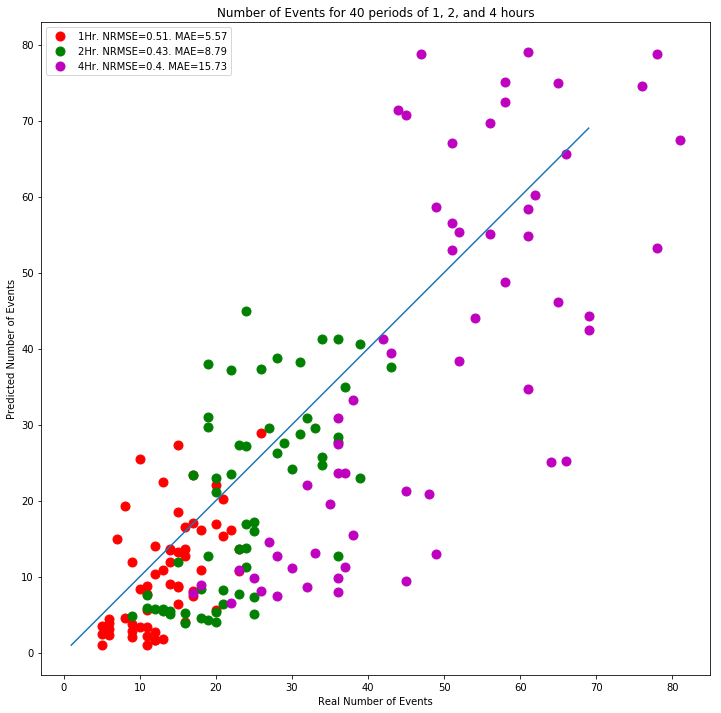

In [20]:
import sklearn.metrics
rmse1 = sqrt(sklearn.metrics.mean_squared_error(real_num_1h, pred_num_1h))/ (np.mean(real_num_1h))
rmse2 = sqrt(sklearn.metrics.mean_squared_error(real_num_2h, pred_num_2h))/(np.mean(real_num_2h))
rmse4 = sqrt(sklearn.metrics.mean_squared_error(real_num_4h, pred_num_4h))/(np.mean(real_num_4h))

mae1 = sklearn.metrics.mean_absolute_error(real_num_1h, pred_num_1h)
mae2 = sklearn.metrics.mean_absolute_error(real_num_2h, pred_num_2h)
mae4 = sklearn.metrics.mean_absolute_error(real_num_4h, pred_num_4h)

plt.figure(figsize=(12,12))
plt.plot(real_num_1h, pred_num_1h, 'r.', label = "1Hr. NRMSE="+str(round(rmse1, 2))+". MAE="+str(round(mae1, 2)), markersize=18)
plt.plot(real_num_2h, pred_num_2h, 'g.', label = "2Hr. NRMSE="+str(round(rmse2, 2))+". MAE="+str(round(mae2, 2)), markersize=18)
plt.plot(real_num_4h, pred_num_4h, 'm.', label = "4Hr. NRMSE="+str(round(rmse4, 2))+". MAE="+str(round(mae4, 2)), markersize=18)
plt.xlabel('Real Number of Events')
plt.ylabel('Predicted Number of Events')
plt.legend()
plt.title('Number of Events for 40 periods of 1, 2, and 4 hours')
x = np.arange(1, 70)
plt.plot(x, x)
#plt.plot(real_nm_24h, pred_num_24h, 'b.')


<Figure size 1440x720 with 0 Axes>

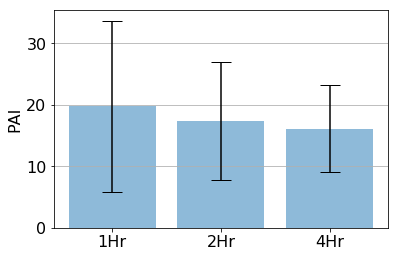

In [21]:
plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(20,10))

labels=['1Hr',
      '2Hr', 
      '4Hr']
x_pos = np.arange(len(labels))
CTEs = [np.mean(pai_1h),
       np.mean(pai_2h), 
       np.mean(pai_4h)]

error = [np.std(pai_1h),
       np.std(pai_2h), 
       np.std(pai_4h)]

fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr = error,  alpha=0.5, ecolor='black', capsize=10)

ax.set_ylabel("PAI")
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
#ax.set_title("Average PAI for 20 predicions over 1, 2, and 4 hours \nfor 50 by 50 grid (cell size of .16 mi^2)")
ax.yaxis.grid(True)

plt.show()

#### What about peak time detection?

In [22]:
percentile = 80

In [ ]:
simulation = PointProcessRun(param_location = save_loc, save_loc = 'PPtesting.npz')
simulation._LastTime

last_t = simulation._LastTime
indices = []
for i in range(end, len(full_data)-1):
    if (full_data.DATE_TIME[i] - last_t).total_seconds() > 3600*2: # 2 hours in seconds
        last_t = full_data.DATE_TIME[i]
        indices.append(i)
        
pred_num_2h = []
real_num_2h = []
pai_2h = []
percentile_2h = []

for i in range(0, 300):
    test_points = full_data[indices[i]:indices[i+1]]
    test_points.reset_index(drop=True, inplace=True)
    ig, ig, pred, ig, real, ig, pai = simulation.test_projection(test_points, num_hotspots=30, top_percent=0)
    pred_num_2h.append(sum(sum(pred)))
    real_num_2h.append(sum(sum(real)))
    pai_2h.append(pai)
    percentile_2h.append(np.percentile(array(pred_num_2h), percentile))
    test_points.to_csv('for_results.csv')
    simulation.update_from_new_inputs(test_points)


Predicting over time of 0.0806367547 days. Generating 8 intensity prediction(s)
Events will be projected until 0.08333333333333333 days from now
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
2.0

The predictive accuracy index for 30 hotspots is: 12.962962962962962. 
Hit number/Tot number: 0.1111111111111111. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 4.626980928822792

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.01709299539202762, Real: 1.0
Grid: (34, 24), Model: 0.010043087736615903, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.018629653478803007, Real: 0.0
Grid: (26, 22), Model: 0.015975593152095246, Real: 0.0
Grid: (27, 22), Model: 0.015177611105186608, Real: 0.0
Grid: (27, 24), Model: 0.014404787531025094, Real: 0.0
Grid: (28, 24), Model: 0.012414180356378124, Real: 0.0
Grid: (26, 23), Model: 0.011674791777484777, Real: 0.0
Grid: (37, 23), Model: 0.011225991014457341, Real: 0.0
Grid: (27, 31), Model: 0.01094130865861

/home/march/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


[]
[]
[]
[]
[]
[]
[]
2.0

The predictive accuracy index for 30 hotspots is: 10.144927536231883. 
Hit number/Tot number: 0.08695652173913043. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 7.676279919730524

Predicted hotspots in real top 30
Grid: (33, 1), Model: 0.016021843478563842, Real: 1.0
Grid: (34, 23), Model: 0.013128569642521036, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.03065104631639917, Real: 0.0
Grid: (28, 23), Model: 0.02908503164652033, Real: 0.0
Grid: (26, 22), Model: 0.02630923841133777, Real: 0.0
Grid: (27, 22), Model: 0.02499903387427289, Real: 0.0
Grid: (27, 24), Model: 0.023713163385857907, Real: 0.0
Grid: (28, 24), Model: 0.02041025942169667, Real: 0.0
Grid: (26, 23), Model: 0.019227645863457175, Real: 0.0
Grid: (37, 23), Model: 0.018466321119389093, Real: 0.0
Grid: (27, 31), Model: 0.01803499129073744, Real: 0.0
Grid: (34, 24), Model: 0.017589446074484996, Real: 0.0
Grid: (32, 25), Model: 0.017158586100

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
4.0

The predictive accuracy index for 30 hotspots is: 23.333333333333332. 
Hit number/Tot number: 0.2. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 21.079022187446217

Predicted hotspots in real top 30
Grid: (27, 23), Model: 0.08489234643528717, Real: 1.0
Grid: (33, 1), Model: 0.04568487858123191, Real: 2.0
Grid: (36, 23), Model: 0.0362302924175422, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.0773710885027445, Real: 0.0
Grid: (26, 22), Model: 0.07616371387498344, Real: 0.0
Grid: (27, 22), Model: 0.06714515213432859, Real: 0.0
Grid: (27, 24), Model: 0.06658210249376795, Real: 0.0
Grid: (28, 24), Model: 0.054550061246293066, Real: 0.0
Grid: (37, 23), Model: 0.05220144548323336, Real: 0.0
Grid: (26, 23), Model: 0.05162728680000062, Real: 0.0
Grid: (34, 24), Model: 0.04994114288356169, Real: 0.0
Grid: (27, 31), Model: 0.048548474433322344, Real: 0.0
Grid: (32, 25), Model: 0.04614972022277283,

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
5.0

The predictive accuracy index for 30 hotspots is: 13.565891472868216. 
Hit number/Tot number: 0.11627906976744186. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 37.53832579151155

Predicted hotspots in real top 30
Grid: (27, 23), Model: 0.15649585316004808, Real: 2.0
Grid: (27, 24), Model: 0.12065164225067963, Real: 1.0
Grid: (33, 1), Model: 0.09832995684780588, Real: 1.0
Grid: (37, 24), Model: 0.06676767109003941, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.14337934185538367, Real: 0.0
Grid: (26, 22), Model: 0.13174093758955138, Real: 0.0
Grid: (27, 22), Model: 0.12147474711707079, Real: 0.0
Grid: (28, 24), Model: 0.09441558793683462, Real: 0.0
Grid: (37, 23), Model: 0.09021564502187389, Real: 0.0
Grid: (26, 23), Model: 0.08968593956428743, Real: 0.0
Grid: (34, 24), Model: 0.08644816009477357, Real: 0.0
Grid: (27, 31), Model: 0.08453811730668835, Real: 0.0
Grid: (32, 25), Model: 0.080302

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
2.0

The predictive accuracy index for 30 hotspots is: 12.280701754385964. 
Hit number/Tot number: 0.10526315789473684. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 29.660064448206665

Predicted hotspots in real top 30
Grid: (51, 33), Model: 0.053984302291176525, Real: 1.0
Grid: (29, 22), Model: 0.0488012273062589, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.13491382124061244, Real: 0.0
Grid: (28, 23), Model: 0.1171885260217751, Real: 0.0
Grid: (27, 24), Model: 0.10426237113786833, Real: 0.0
Grid: (26, 22), Model: 0.10122937539132393, Real: 0.0
Grid: (27, 22), Model: 0.09349239971775067, Real: 0.0
Grid: (33, 1), Model: 0.07859399817422852, Real: 0.0
Grid: (28, 24), Model: 0.07258909775659923, Real: 0.0
Grid: (34, 24), Model: 0.07038240850028599, Real: 0.0
Grid: (37, 23), Model: 0.06928781593048035, Real: 0.0
Grid: (26, 23), Model: 0.06915610318326815, Real: 0.0
Grid: (27, 31), Model: 0.065

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
3.0

The predictive accuracy index for 30 hotspots is: 38.888888888888886. 
Hit number/Tot number: 0.3333333333333333. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 4.8718473934562665

Predicted hotspots in real top 30
Grid: (33, 25), Model: 0.008669549473032636, Real: 1.0
Grid: (29, 22), Model: 0.00851136154999252, Real: 1.0
Grid: (41, 26), Model: 0.00840564199417195, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.021481943287215245, Real: 0.0
Grid: (28, 23), Model: 0.019299856222308315, Real: 0.0
Grid: (27, 24), Model: 0.01732519808948579, Real: 0.0
Grid: (26, 22), Model: 0.016274829911854877, Real: 0.0
Grid: (27, 22), Model: 0.015054283445663723, Real: 0.0
Grid: (33, 1), Model: 0.012507824345842338, Real: 0.0
Grid: (26, 23), Model: 0.01177412840387242, Real: 0.0
Grid: (28, 24), Model: 0.011676777743863217, Real: 0.0
Grid: (34, 24), Model: 0.011291684107385996, Real: 0.0
Gr


Predicting over time of 0.0776737851 days. Generating 8 intensity prediction(s)
Events will be projected until 0.08333333333333333 days from now
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
5.0

The predictive accuracy index for 30 hotspots is: 23.333333333333332. 
Hit number/Tot number: 0.2. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 16.037603730906177

Predicted hotspots in real top 30
Grid: (27, 22), Model: 0.048713982405457074, Real: 1.0
Grid: (32, 25), Model: 0.03635301331677508, Real: 1.0
Grid: (27, 31), Model: 0.03617762044283203, Real: 1.0
Grid: (26, 27), Model: 0.029352243886202625, Real: 1.0
Grid: (47, 32), Model: 0.02820506989536987, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.06892458445784322, Real: 0.0
Grid: (28, 23), Model: 0.06175907872141916, Real: 0.0
Grid: (26, 22), Model: 0.05668357265249929, Real: 0.0
Grid: (27, 24), Model: 0.055662070132502725, Real: 0.0
Grid: (33, 1), Model: 0.04009979820331418, Real: 0.0
Gr

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
6.0

The predictive accuracy index for 30 hotspots is: 17.94871794871795. 
Hit number/Tot number: 0.15384615384615385. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 40.556169320097794

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.15671408874521348, Real: 3.0
Grid: (27, 24), Model: 0.14213695080575423, Real: 1.0
Grid: (26, 27), Model: 0.07774184808259482, Real: 1.0
Grid: (33, 25), Model: 0.07439035726534593, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.16906080752081085, Real: 0.0
Grid: (26, 22), Model: 0.14481902472708852, Real: 0.0
Grid: (27, 22), Model: 0.13079581159851003, Real: 0.0
Grid: (32, 25), Model: 0.1002233504145424, Real: 0.0
Grid: (33, 1), Model: 0.09843080242214174, Real: 0.0
Grid: (27, 31), Model: 0.09453617842099851, Real: 0.0
Grid: (26, 23), Model: 0.09392997594432216, Real: 0.0
Grid: (28, 24), Model: 0.09332992197740408, Real: 0.0
Grid: (34, 24)

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
5.0

The predictive accuracy index for 30 hotspots is: 21.604938271604937. 
Hit number/Tot number: 0.18518518518518517. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 29.593816825837795

Predicted hotspots in real top 30
Grid: (27, 24), Model: 0.10451208568518425, Real: 1.0
Grid: (26, 23), Model: 0.07090355592950956, Real: 1.0
Grid: (26, 27), Model: 0.0590332231650652, Real: 2.0
Grid: (33, 25), Model: 0.05678475511149697, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.12574185888430103, Real: 0.0
Grid: (27, 23), Model: 0.11987979884733276, Real: 0.0
Grid: (26, 22), Model: 0.10274028293127986, Real: 0.0
Grid: (27, 22), Model: 0.09695790486070112, Real: 0.0
Grid: (32, 25), Model: 0.07478598422385926, Real: 0.0
Grid: (27, 31), Model: 0.07116210578734629, Real: 0.0
Grid: (28, 24), Model: 0.07040720444265025, Real: 0.0
Grid: (33, 1), Model: 0.06981699905020612, Real: 0.0
Grid: (34, 24), Model: 0.

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
1.0

The predictive accuracy index for 30 hotspots is: 6.140350877192982. 
Hit number/Tot number: 0.05263157894736842. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 4.334411558235943

Predicted hotspots in real top 30
Grid: (26, 22), Model: 0.01523111394959496, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.017770025059153725, Real: 0.0
Grid: (27, 23), Model: 0.017107551746550827, Real: 0.0
Grid: (27, 24), Model: 0.015994364458463882, Real: 0.0
Grid: (27, 22), Model: 0.014403671762991628, Real: 0.0
Grid: (27, 31), Model: 0.010726541617046895, Real: 0.0
Grid: (26, 23), Model: 0.010678249518237792, Real: 0.0
Grid: (28, 24), Model: 0.010638405992064956, Real: 0.0
Grid: (32, 25), Model: 0.010632181005543239, Real: 0.0
Grid: (33, 1), Model: 0.009968846890607726, Real: 0.0
Grid: (34, 24), Model: 0.009719442492671072, Real: 0.0
Grid: (26, 27), Model: 0.00952888975175037, Real: 0.0
Grid: (37, 23), Model:

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
5.0

The predictive accuracy index for 30 hotspots is: 19.444444444444443. 
Hit number/Tot number: 0.16666666666666666. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 24.111880954424326

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.09574039449173868, Real: 2.0
Grid: (27, 22), Model: 0.07805049392247133, Real: 1.0
Grid: (33, 1), Model: 0.06053427887981235, Real: 1.0
Grid: (33, 25), Model: 0.04702248337113831, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.0928645506174933, Real: 0.0
Grid: (27, 24), Model: 0.08960370132293546, Real: 0.0
Grid: (26, 22), Model: 0.0856167694714276, Real: 0.0
Grid: (27, 31), Model: 0.05816678096058433, Real: 0.0
Grid: (26, 23), Model: 0.05792004977028918, Real: 0.0
Grid: (28, 24), Model: 0.057722077844024125, Real: 0.0
Grid: (32, 25), Model: 0.0575816029565127, Real: 0.0
Grid: (34, 24), Model: 0.05289862960150641, Real: 0.0
Grid: (26, 27), Mode

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
4.0

The predictive accuracy index for 30 hotspots is: 21.21212121212121. 
Hit number/Tot number: 0.18181818181818182. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 37.220019636259316

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.1527044590317693, Real: 1.0
Grid: (33, 1), Model: 0.10026946914419653, Real: 1.0
Grid: (34, 24), Model: 0.08476780879969352, Real: 1.0
Grid: (37, 23), Model: 0.07538459868236505, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.1399509923202824, Real: 0.0
Grid: (27, 24), Model: 0.13431620030835945, Real: 0.0
Grid: (26, 22), Model: 0.1334862384102347, Real: 0.0
Grid: (27, 22), Model: 0.12217536708286852, Real: 0.0
Grid: (27, 31), Model: 0.08764109237249831, Real: 0.0
Grid: (26, 23), Model: 0.08726914499595503, Real: 0.0
Grid: (28, 24), Model: 0.086994722563403, Real: 0.0
Grid: (32, 25), Model: 0.08665972069709602, Real: 0.0
Grid: (26, 27), Model: 0.08227

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
5.0

The predictive accuracy index for 30 hotspots is: 29.166666666666664. 
Hit number/Tot number: 0.25. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 23.036424006283234

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.09768946608734479, Real: 1.0
Grid: (34, 24), Model: 0.054206296025284435, Real: 1.0
Grid: (32, 25), Model: 0.05241061134510101, Real: 1.0
Grid: (37, 24), Model: 0.042370976327420554, Real: 1.0
Grid: (32, 31), Model: 0.040358991773234563, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.08469996163873116, Real: 0.0
Grid: (27, 24), Model: 0.08396421261792784, Real: 0.0
Grid: (26, 22), Model: 0.08050004309242047, Real: 0.0
Grid: (27, 22), Model: 0.07376510267748619, Real: 0.0
Grid: (33, 1), Model: 0.06308773148912271, Real: 0.0
Grid: (27, 31), Model: 0.056088369592579915, Real: 0.0
Grid: (28, 24), Model: 0.05572598803644536, Real: 0.0
Grid: (26, 23), Model: 0.0528249784

[]
[]
[]
[]
[]
[]
[]
[]
[]
1.0

The predictive accuracy index for 30 hotspots is: 8.974358974358974. 
Hit number/Tot number: 0.07692307692307693. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 5.5401044022964125

Predicted hotspots in real top 30
Grid: (44, 25), Model: 0.010054898317180714, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.02349320262624184, Real: 0.0
Grid: (27, 24), Model: 0.02042309605522467, Real: 0.0
Grid: (27, 23), Model: 0.019982616882803086, Real: 0.0
Grid: (26, 22), Model: 0.018932778777285445, Real: 0.0
Grid: (27, 22), Model: 0.01810538255140417, Real: 0.0
Grid: (34, 24), Model: 0.014908196839659557, Real: 0.0
Grid: (33, 1), Model: 0.01472839610505967, Real: 0.0
Grid: (27, 31), Model: 0.013222589010534115, Real: 0.0
Grid: (28, 24), Model: 0.01311127873261349, Real: 0.0
Grid: (32, 25), Model: 0.013052263676585655, Real: 0.0
Grid: (26, 23), Model: 0.012469197413502808, Real: 0.0
Grid: (37, 23), Model: 0.01218

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
3.0

The predictive accuracy index for 30 hotspots is: 13.999999999999998. 
Hit number/Tot number: 0.12. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 17.18856801023987

Predicted hotspots in real top 30
Grid: (27, 22), Model: 0.0549392597430389, Real: 1.0
Grid: (27, 31), Model: 0.040143895509544336, Real: 1.0
Grid: (32, 25), Model: 0.03964403900139668, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.07077746550257147, Real: 0.0
Grid: (27, 24), Model: 0.061792443995484, Real: 0.0
Grid: (27, 23), Model: 0.06086729279534432, Real: 0.0
Grid: (26, 22), Model: 0.05753140536353364, Real: 0.0
Grid: (34, 24), Model: 0.04714581063404897, Real: 0.0
Grid: (33, 1), Model: 0.044472448889420084, Real: 0.0
Grid: (26, 23), Model: 0.040222255559654946, Real: 0.0
Grid: (28, 24), Model: 0.03986278855299192, Real: 0.0
Grid: (37, 23), Model: 0.037049193512943605, Real: 0.0
Grid: (26, 27), Model: 0.03537795030698285, Real


Predicting over time of 0.0788311951 days. Generating 8 intensity prediction(s)
Events will be projected until 0.08333333333333333 days from now
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
7.0

The predictive accuracy index for 30 hotspots is: 31.41025641025641. 
Hit number/Tot number: 0.2692307692307692. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 37.37768959773154

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.1495738089279186, Real: 1.0
Grid: (27, 23), Model: 0.129769377806632, Real: 2.0
Grid: (26, 22), Model: 0.12244831835566387, Real: 1.0
Grid: (27, 22), Model: 0.12154029136533556, Real: 2.0
Grid: (28, 24), Model: 0.0848942456891887, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 24), Model: 0.1310677226128737, Real: 0.0
Grid: (34, 24), Model: 0.09948664943918652, Real: 0.0
Grid: (33, 1), Model: 0.09432448567283996, Real: 0.0
Grid: (27, 31), Model: 0.09018245160598647, Real: 0.0
Grid: (32, 25), Model: 0.08905339813

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
2.0

The predictive accuracy index for 30 hotspots is: 12.280701754385964. 
Hit number/Tot number: 0.10526315789473684. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 12.737374667774834

Predicted hotspots in real top 30
Grid: (28, 24), Model: 0.03157035278504871, Real: 1.0
Grid: (44, 25), Model: 0.02317164826126005, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.05279856121938793, Real: 0.0
Grid: (27, 23), Model: 0.046534586806895845, Real: 0.0
Grid: (27, 22), Model: 0.04529068399061075, Real: 0.0
Grid: (27, 24), Model: 0.04357123139559632, Real: 0.0
Grid: (26, 22), Model: 0.042409703239105284, Real: 0.0
Grid: (34, 24), Model: 0.03294218042830621, Real: 0.0
Grid: (33, 1), Model: 0.03125961838724966, Real: 0.0
Grid: (26, 23), Model: 0.030211785093808115, Real: 0.0
Grid: (27, 31), Model: 0.03001513164080475, Real: 0.0
Grid: (32, 25), Model: 0.029606457264227937, Real: 0.0
Grid: (37, 23), Model: 

[]
[]
[]
[]
[]
[]
[]
[]
1.0

The predictive accuracy index for 30 hotspots is: 6.481481481481481. 
Hit number/Tot number: 0.05555555555555555. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 8.33573550615449

Predicted hotspots in real top 30
Grid: (28, 24), Model: 0.0212091176888732, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.03465148853862983, Real: 0.0
Grid: (27, 23), Model: 0.02979749416574266, Real: 0.0
Grid: (27, 22), Model: 0.028830320094969834, Real: 0.0
Grid: (27, 24), Model: 0.027916345220861224, Real: 0.0
Grid: (26, 22), Model: 0.027186286310718778, Real: 0.0
Grid: (34, 24), Model: 0.02212043757006708, Real: 0.0
Grid: (33, 1), Model: 0.019996748149146166, Real: 0.0
Grid: (26, 23), Model: 0.019328290639956745, Real: 0.0
Grid: (27, 31), Model: 0.01926184326709702, Real: 0.0
Grid: (37, 23), Model: 0.019024536582462694, Real: 0.0
Grid: (32, 25), Model: 0.018976054519526286, Real: 0.0
Grid: (26, 27), Model: 0.01723147941

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
2.0

The predictive accuracy index for 30 hotspots is: 6.481481481481481. 
Hit number/Tot number: 0.05555555555555555. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 27.714462872813677

Predicted hotspots in real top 30
Grid: (34, 24), Model: 0.0717056103974553, Real: 1.0
Grid: (26, 27), Model: 0.056127643889647034, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.11206255357683914, Real: 0.0
Grid: (27, 23), Model: 0.09706073615487656, Real: 0.0
Grid: (27, 24), Model: 0.09457739495768538, Real: 0.0
Grid: (27, 22), Model: 0.0935132777081151, Real: 0.0
Grid: (26, 22), Model: 0.08863725362508906, Real: 0.0
Grid: (28, 24), Model: 0.07229193150278629, Real: 0.0
Grid: (33, 1), Model: 0.06508082742137573, Real: 0.0
Grid: (26, 23), Model: 0.06308605177938591, Real: 0.0
Grid: (27, 31), Model: 0.06287047745784352, Real: 0.0
Grid: (32, 25), Model: 0.061872087826732175, Real: 0.0
Grid: (37, 23), Model:

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
3.0

The predictive accuracy index for 30 hotspots is: 12.499999999999998. 
Hit number/Tot number: 0.10714285714285714. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 38.738618666702834

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.15200056323194727, Real: 1.0
Grid: (26, 22), Model: 0.12095410241882662, Real: 1.0
Grid: (51, 33), Model: 0.07281220283749863, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.13722443132448534, Real: 0.0
Grid: (27, 24), Model: 0.12870104842535302, Real: 0.0
Grid: (27, 22), Model: 0.1270653984850231, Real: 0.0
Grid: (34, 24), Model: 0.10730447401372478, Real: 0.0
Grid: (28, 24), Model: 0.09799848008842277, Real: 0.0
Grid: (27, 31), Model: 0.09077148111789396, Real: 0.0
Grid: (33, 1), Model: 0.0886600232891307, Real: 0.0
Grid: (26, 23), Model: 0.08586023542585416, Real: 0.0
Grid: (32, 25), Model: 0.0844465355167046, Real: 0.0
Grid: (37, 23), Model: 0.08

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
3.0

The predictive accuracy index for 30 hotspots is: 24.999999999999996. 
Hit number/Tot number: 0.21428571428571427. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 5.111406441101059

Predicted hotspots in real top 30
Grid: (26, 22), Model: 0.016301858230905113, Real: 1.0
Grid: (36, 24), Model: 0.010058789154825507, Real: 1.0
Grid: (35, 32), Model: 0.008559029772945198, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.020159410860723537, Real: 0.0
Grid: (27, 23), Model: 0.018388984980480635, Real: 0.0
Grid: (27, 24), Model: 0.016626418653571336, Real: 0.0
Grid: (27, 22), Model: 0.016396167460457106, Real: 0.0
Grid: (34, 24), Model: 0.013771880695848681, Real: 0.0
Grid: (28, 24), Model: 0.01262195597564174, Real: 0.0
Grid: (27, 31), Model: 0.011732040306960578, Real: 0.0
Grid: (33, 1), Model: 0.01146271921887504, Real: 0.0
Grid: (26, 23), Model: 0.011114434778272076, Real: 0.0
Grid: (32, 2

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
5.0

The predictive accuracy index for 30 hotspots is: 23.333333333333332. 
Hit number/Tot number: 0.2. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 10.578504284982735

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.04077701802573247, Real: 2.0
Grid: (27, 31), Model: 0.023888642259041516, Real: 1.0
Grid: (26, 27), Model: 0.021359010529547175, Real: 1.0
Grid: (29, 22), Model: 0.01912636434145486, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.037314329929376486, Real: 0.0
Grid: (26, 22), Model: 0.03447651847450784, Real: 0.0
Grid: (27, 24), Model: 0.03382766360969738, Real: 0.0
Grid: (27, 22), Model: 0.033327257863258554, Real: 0.0
Grid: (34, 24), Model: 0.027862161905816706, Real: 0.0
Grid: (28, 24), Model: 0.025615900177846457, Real: 0.0
Grid: (33, 1), Model: 0.023335247782480452, Real: 0.0
Grid: (26, 23), Model: 0.022658896209695533, Real: 0.0
Grid: (32, 25), Model: 0.0223

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
4.0

The predictive accuracy index for 30 hotspots is: 17.94871794871795. 
Hit number/Tot number: 0.15384615384615385. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 31.46158826727335

Predicted hotspots in real top 30
Grid: (27, 23), Model: 0.11266949449049597, Real: 2.0
Grid: (34, 24), Model: 0.08469673072623929, Real: 1.0
Grid: (33, 25), Model: 0.05491093308582122, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.1338497285306356, Real: 0.0
Grid: (26, 22), Model: 0.10007864146423627, Real: 0.0
Grid: (27, 24), Model: 0.09840777972054346, Real: 0.0
Grid: (27, 22), Model: 0.09688133011226152, Real: 0.0
Grid: (28, 24), Model: 0.07437614800946589, Real: 0.0
Grid: (27, 31), Model: 0.0734648698106375, Real: 0.0
Grid: (32, 25), Model: 0.06909903166909573, Real: 0.0
Grid: (33, 1), Model: 0.06797292250860315, Real: 0.0
Grid: (36, 24), Model: 0.06678349697454959, Real: 0.0
Grid: (26, 23), Model: 0.066040735990

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
2.0

The predictive accuracy index for 30 hotspots is: 7.070707070707071. 
Hit number/Tot number: 0.06060606060606061. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 31.727155028573794

Predicted hotspots in real top 30
Grid: (44, 25), Model: 0.06407611595853913, Real: 1.0
Grid: (51, 33), Model: 0.05892482190343787, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.13875514256473015, Real: 0.0
Grid: (27, 23), Model: 0.1183804893934293, Real: 0.0
Grid: (27, 22), Model: 0.09964323791499745, Real: 0.0
Grid: (26, 22), Model: 0.09857500430684575, Real: 0.0
Grid: (27, 24), Model: 0.09709144208729943, Real: 0.0
Grid: (34, 24), Model: 0.09521812396809085, Real: 0.0
Grid: (26, 27), Model: 0.07717872535031844, Real: 0.0
Grid: (28, 24), Model: 0.07327255214488491, Real: 0.0
Grid: (27, 31), Model: 0.07234684704388974, Real: 0.0
Grid: (34, 23), Model: 0.07112591775113689, Real: 0.0
Grid: (32, 25), Model: 0.

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
0.0

The predictive accuracy index for 30 hotspots is: 0.0. 
Hit number/Tot number: 0.0. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 3.8723735130094314

Predicted hotspots in real top 30

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.016394084081318937, Real: 0.0
Grid: (27, 23), Model: 0.01505081682855361, Real: 0.0
Grid: (27, 22), Model: 0.012393263113766834, Real: 0.0
Grid: (26, 22), Model: 0.011789944634197837, Real: 0.0
Grid: (27, 24), Model: 0.011629075930974847, Real: 0.0
Grid: (34, 24), Model: 0.01125631870336644, Real: 0.0
Grid: (26, 27), Model: 0.009627811057773808, Real: 0.0
Grid: (28, 24), Model: 0.008765121902008306, Real: 0.0
Grid: (27, 31), Model: 0.008653629664515008, Real: 0.0
Grid: (34, 23), Model: 0.008425510026854805, Real: 0.0
Grid: (32, 25), Model: 0.00814580197159695, Real: 0.0
Grid: (44, 25), Model: 0.008110314212764789, Real: 0.0
Grid: (51, 33), Model: 0.008049469383483748, 


Predicting over time of 0.0785071203 days. Generating 8 intensity prediction(s)
Events will be projected until 0.08333333333333333 days from now
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
3.0

The predictive accuracy index for 30 hotspots is: 10.9375. 
Hit number/Tot number: 0.09375. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 16.308739325583154

Predicted hotspots in real top 30
Grid: (34, 24), Model: 0.046241141509888416, Real: 1.0
Grid: (33, 25), Model: 0.028952332378952412, Real: 1.0
Grid: (50, 32), Model: 0.027166588886882517, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.06728570596371396, Real: 0.0
Grid: (27, 23), Model: 0.06189490490958216, Real: 0.0
Grid: (27, 22), Model: 0.05119485633586314, Real: 0.0
Grid: (26, 22), Model: 0.04888406427148484, Real: 0.0
Grid: (27, 24), Model: 0.048267696479459325, Real: 0.0
Grid: (26, 27), Model: 0.039493881500602845, Real: 0.0
Grid: (34, 23), Model: 0.036829599980345434, Real: 0.0

[]
[]
[]
[]
[]
[]
[]
[]
2.0

The predictive accuracy index for 30 hotspots is: 9.722222222222221. 
Hit number/Tot number: 0.08333333333333333. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 30.74956551157836

Predicted hotspots in real top 30
Grid: (26, 27), Model: 0.07625116987121854, Real: 1.0
Grid: (26, 23), Model: 0.06032768839474624, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.12320705890488162, Real: 0.0
Grid: (27, 23), Model: 0.1174159070670124, Real: 0.0
Grid: (27, 22), Model: 0.09430750660521015, Real: 0.0
Grid: (26, 22), Model: 0.09033311233263927, Real: 0.0
Grid: (27, 24), Model: 0.0892680232351755, Real: 0.0
Grid: (34, 24), Model: 0.08855667531268398, Real: 0.0
Grid: (34, 23), Model: 0.06746493701350124, Real: 0.0
Grid: (28, 24), Model: 0.06717321227293316, Real: 0.0
Grid: (27, 31), Model: 0.0663526209751692, Real: 0.0
Grid: (44, 25), Model: 0.06540078779481195, Real: 0.0
Grid: (37, 23), Model: 0.0629290295213421, 

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
2.0

The predictive accuracy index for 30 hotspots is: 8.045977011494251. 
Hit number/Tot number: 0.06896551724137931. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 32.86660531280621

Predicted hotspots in real top 30
Grid: (35, 32), Model: 0.055829709229652025, Real: 1.0
Grid: (32, 31), Model: 0.054949578835299835, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.12800145817929276, Real: 0.0
Grid: (27, 23), Model: 0.12205717151557954, Real: 0.0
Grid: (26, 22), Model: 0.10296488752256315, Real: 0.0
Grid: (27, 22), Model: 0.0985421636738423, Real: 0.0
Grid: (27, 24), Model: 0.09766529761121479, Real: 0.0
Grid: (34, 24), Model: 0.0962133663351672, Real: 0.0
Grid: (26, 27), Model: 0.08314488361824075, Real: 0.0
Grid: (34, 23), Model: 0.0743210923188725, Real: 0.0
Grid: (26, 23), Model: 0.07142446102476835, Real: 0.0
Grid: (28, 24), Model: 0.07038739023598849, Real: 0.0
Grid: (37, 23), Model: 0.0700


Predicting over time of 0.0794330483 days. Generating 8 intensity prediction(s)
Events will be projected until 0.08333333333333333 days from now
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
0.0

The predictive accuracy index for 30 hotspots is: 0.0. 
Hit number/Tot number: 0.0. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 2.934226389391857

Predicted hotspots in real top 30

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.011518696952383504, Real: 0.0
Grid: (27, 23), Model: 0.010642218255508696, Real: 0.0
Grid: (26, 22), Model: 0.008994747090703484, Real: 0.0
Grid: (27, 22), Model: 0.008631270532132237, Real: 0.0
Grid: (27, 24), Model: 0.00855743486241626, Real: 0.0
Grid: (34, 24), Model: 0.008358131792731363, Real: 0.0
Grid: (26, 27), Model: 0.00758303313884339, Real: 0.0
Grid: (26, 23), Model: 0.006618412560223406, Real: 0.0
Grid: (34, 23), Model: 0.006467389827125944, Real: 0.0
Grid: (28, 24), Model: 0.006180546199625972, Real: 0.0
Grid: (37, 2

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
2.0

The predictive accuracy index for 30 hotspots is: 7.291666666666666. 
Hit number/Tot number: 0.0625. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 19.172423376980504

Predicted hotspots in real top 30
Grid: (33, 23), Model: 0.03407742998846211, Real: 1.0
Grid: (29, 22), Model: 0.031985727659953916, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.07594908108348276, Real: 0.0
Grid: (27, 23), Model: 0.06810507405960756, Real: 0.0
Grid: (26, 22), Model: 0.057673434550278214, Real: 0.0
Grid: (27, 24), Model: 0.05751471244348109, Real: 0.0
Grid: (27, 22), Model: 0.05546275221646673, Real: 0.0
Grid: (34, 24), Model: 0.05331727186869338, Real: 0.0
Grid: (26, 27), Model: 0.04823237624663084, Real: 0.0
Grid: (26, 23), Model: 0.04230715859258274, Real: 0.0
Grid: (34, 23), Model: 0.04133903913633136, Real: 0.0
Grid: (28, 24), Model: 0.03980339681520165, Real: 0.0
Grid: (27, 31), Model: 0.0393902246844500

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
6.0

The predictive accuracy index for 30 hotspots is: 18.421052631578945. 
Hit number/Tot number: 0.15789473684210525. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 37.33023223235231

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.14816426854139197, Real: 1.0
Grid: (27, 23), Model: 0.12932110575084732, Real: 1.0
Grid: (37, 23), Model: 0.08421143698798432, Real: 2.0
Grid: (33, 23), Model: 0.07410121627760369, Real: 1.0
Grid: (44, 32), Model: 0.06588674248003504, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 24), Model: 0.11877717391594561, Real: 0.0
Grid: (27, 22), Model: 0.11037619519071756, Real: 0.0
Grid: (26, 22), Model: 0.10970919373123988, Real: 0.0
Grid: (34, 24), Model: 0.10098062282369463, Real: 0.0
Grid: (26, 27), Model: 0.09594165100732051, Real: 0.0
Grid: (26, 23), Model: 0.08030076748862298, Real: 0.0
Grid: (34, 23), Model: 0.07845674122974615, Real: 0.0
Grid: (28, 24), Model: 0.07597986

[]
[]
[]
[]
[]
[]
[]
[]
[]
5.0

The predictive accuracy index for 30 hotspots is: 22.435897435897434. 
Hit number/Tot number: 0.19230769230769232. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 25.2086036458531

Predicted hotspots in real top 30
Grid: (26, 22), Model: 0.07243352567161718, Real: 2.0
Grid: (37, 23), Model: 0.06456096473449224, Real: 1.0
Grid: (36, 24), Model: 0.048819529865470286, Real: 1.0
Grid: (35, 32), Model: 0.04282438651560645, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.10324413992507699, Real: 0.0
Grid: (27, 23), Model: 0.09151043646397664, Real: 0.0
Grid: (27, 22), Model: 0.07919687680952812, Real: 0.0
Grid: (27, 24), Model: 0.07800722341491921, Real: 0.0
Grid: (34, 24), Model: 0.06639695196798301, Real: 0.0
Grid: (26, 27), Model: 0.06280531608548232, Real: 0.0
Grid: (26, 23), Model: 0.05602784978606842, Real: 0.0
Grid: (34, 23), Model: 0.05482892585512816, Real: 0.0
Grid: (33, 23), Model: 0.05167896248


Predicting over time of 0.0796529562 days. Generating 8 intensity prediction(s)
Events will be projected until 0.08333333333333333 days from now
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
3.0

The predictive accuracy index for 30 hotspots is: 26.923076923076923. 
Hit number/Tot number: 0.23076923076923078. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 4.127721373137155

Predicted hotspots in real top 30
Grid: (26, 22), Model: 0.012693366735472217, Real: 1.0
Grid: (26, 27), Model: 0.01005377423254089, Real: 1.0
Grid: (31, 22), Model: 0.0067098885494234995, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.01647520386075269, Real: 0.0
Grid: (27, 23), Model: 0.014673251422357021, Real: 0.0
Grid: (27, 22), Model: 0.013204133474926775, Real: 0.0
Grid: (27, 24), Model: 0.012525898851827616, Real: 0.0
Grid: (37, 23), Model: 0.010780622287154665, Real: 0.0
Grid: (34, 24), Model: 0.010668032400914762, Real: 0.0
Grid: (26, 23), Model: 0.0089959623865

[]
[]
[]
[]
[]
[]
[]
[]
2.0

The predictive accuracy index for 30 hotspots is: 8.641975308641975. 
Hit number/Tot number: 0.07407407407407407. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 18.619557147829845

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.07256635465776283, Real: 1.0
Grid: (44, 25), Model: 0.03413560915961899, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.06721537810856813, Real: 0.0
Grid: (26, 22), Model: 0.058442270957432055, Real: 0.0
Grid: (27, 22), Model: 0.05829642225444709, Real: 0.0
Grid: (27, 24), Model: 0.05548782183419194, Real: 0.0
Grid: (37, 23), Model: 0.04733595034999785, Real: 0.0
Grid: (34, 24), Model: 0.04726326189903949, Real: 0.0
Grid: (26, 27), Model: 0.046663219179260064, Real: 0.0
Grid: (26, 23), Model: 0.03985345279428339, Real: 0.0
Grid: (34, 23), Model: 0.03898213433240629, Real: 0.0
Grid: (36, 24), Model: 0.0370010645430197, Real: 0.0
Grid: (33, 23), Model: 0.0365921048170


Predicting over time of 0.0833103718 days. Generating 8 intensity prediction(s)
Events will be projected until 0.08333333333333333 days from now
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
5.0

The predictive accuracy index for 30 hotspots is: 15.765765765765765. 
Hit number/Tot number: 0.13513513513513514. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 38.28502157774587

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.14979206796634129, Real: 2.0
Grid: (37, 23), Model: 0.09936706571825031, Real: 1.0
Grid: (26, 27), Model: 0.09342443355499434, Real: 1.0
Grid: (44, 25), Model: 0.07851210787357549, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.1348150145316239, Real: 0.0
Grid: (27, 22), Model: 0.12176200338609168, Real: 0.0
Grid: (26, 22), Model: 0.11727692669312847, Real: 0.0
Grid: (27, 24), Model: 0.11656654936533628, Real: 0.0
Grid: (34, 24), Model: 0.09509787180488932, Real: 0.0
Grid: (26, 23), Model: 0.08504338167409208, Real: 

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
4.0

The predictive accuracy index for 30 hotspots is: 23.333333333333332. 
Hit number/Tot number: 0.2. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 8.792753283056983

Predicted hotspots in real top 30
Grid: (26, 22), Model: 0.026294350788720663, Real: 1.0
Grid: (26, 23), Model: 0.019053440011453947, Real: 1.0
Grid: (26, 26), Model: 0.014256371785625508, Real: 1.0
Grid: (47, 32), Model: 0.01415008690171343, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.035581036600190144, Real: 0.0
Grid: (27, 23), Model: 0.030207071445097777, Real: 0.0
Grid: (27, 24), Model: 0.027258743078193495, Real: 0.0
Grid: (27, 22), Model: 0.027238346007222844, Real: 0.0
Grid: (37, 23), Model: 0.02431551612237542, Real: 0.0
Grid: (26, 27), Model: 0.0219685314094918, Real: 0.0
Grid: (34, 24), Model: 0.021359628970983754, Real: 0.0
Grid: (34, 23), Model: 0.018748647678649442, Real: 0.0
Grid: (33, 23), Model: 0.0186806597

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
0.0

The predictive accuracy index for 30 hotspots is: 0.0. 
Hit number/Tot number: 0.0. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 6.340302949370372

Predicted hotspots in real top 30

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.024989499068172293, Real: 0.0
Grid: (27, 23), Model: 0.02137334322212685, Real: 0.0
Grid: (27, 24), Model: 0.02004858329623029, Real: 0.0
Grid: (27, 22), Model: 0.020028249335529692, Real: 0.0
Grid: (26, 22), Model: 0.019408303533701418, Real: 0.0
Grid: (37, 23), Model: 0.017031670138805733, Real: 0.0
Grid: (26, 27), Model: 0.015479556140939026, Real: 0.0
Grid: (34, 24), Model: 0.01514633939561048, Real: 0.0
Grid: (26, 23), Model: 0.014261601567468658, Real: 0.0
Grid: (34, 23), Model: 0.013255787856060658, Real: 0.0
Grid: (33, 23), Model: 0.013153595660763035, Real: 0.0
Grid: (44, 25), Model: 0.013121978592370753, Real: 0.0
Grid: (51, 33), Model: 0.012715050181

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
4.0

The predictive accuracy index for 30 hotspots is: 18.666666666666668. 
Hit number/Tot number: 0.16. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 27.359904483335626

Predicted hotspots in real top 30
Grid: (27, 24), Model: 0.08474539904593456, Real: 1.0
Grid: (36, 24), Model: 0.05399868775918567, Real: 1.0
Grid: (35, 23), Model: 0.04647305716811593, Real: 1.0
Grid: (33, 1), Model: 0.04623967788906868, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.10535622934145245, Real: 0.0
Grid: (27, 23), Model: 0.09416203868185884, Real: 0.0
Grid: (27, 22), Model: 0.08823605585384513, Real: 0.0
Grid: (26, 22), Model: 0.08216646209037756, Real: 0.0
Grid: (37, 23), Model: 0.0717022409742677, Real: 0.0
Grid: (26, 27), Model: 0.06545060759192936, Real: 0.0
Grid: (34, 24), Model: 0.06434751270791794, Real: 0.0
Grid: (26, 23), Model: 0.06034728418556157, Real: 0.0
Grid: (34, 23), Model: 0.05621382846890334,

[]
[]
[]
[]
[]
[]
[]
[]
6.0

The predictive accuracy index for 30 hotspots is: 18.421052631578945. 
Hit number/Tot number: 0.15789473684210525. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 37.63537198208919

Predicted hotspots in real top 30
Grid: (27, 24), Model: 0.11845383026433312, Real: 2.0
Grid: (34, 23), Model: 0.07573705241233177, Real: 1.0
Grid: (32, 25), Model: 0.06411361192289235, Real: 1.0
Grid: (26, 28), Model: 0.05910844174237693, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.14597784564171387, Real: 0.0
Grid: (27, 23), Model: 0.13129315251123017, Real: 0.0
Grid: (27, 22), Model: 0.12318893560838462, Real: 0.0
Grid: (26, 22), Model: 0.1106248819856305, Real: 0.0
Grid: (37, 23), Model: 0.09597814208251645, Real: 0.0
Grid: (26, 27), Model: 0.0879256276319331, Real: 0.0
Grid: (34, 24), Model: 0.0867997006546321, Real: 0.0
Grid: (26, 23), Model: 0.08115336253898088, Real: 0.0
Grid: (36, 24), Model: 0.07714909230284189

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
5.0

The predictive accuracy index for 30 hotspots is: 20.114942528735632. 
Hit number/Tot number: 0.1724137931034483. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 4.586257492278563

Predicted hotspots in real top 30
Grid: (27, 22), Model: 0.014604490712952507, Real: 1.0
Grid: (36, 23), Model: 0.008963149998581435, Real: 1.0
Grid: (47, 32), Model: 0.008456976268661836, Real: 2.0
Grid: (26, 26), Model: 0.007494520395761147, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.0172882918059237, Real: 0.0
Grid: (27, 24), Model: 0.016368230758729906, Real: 0.0
Grid: (27, 23), Model: 0.015599996154242301, Real: 0.0
Grid: (26, 22), Model: 0.013184250872889288, Real: 0.0
Grid: (37, 23), Model: 0.011387359842330828, Real: 0.0
Grid: (26, 27), Model: 0.010463272141334762, Real: 0.0
Grid: (34, 24), Model: 0.010366338122763356, Real: 0.0
Grid: (27, 31), Model: 0.00975752025999081, Real: 0.0
Grid: (26, 23), 


Predicting over time of 0.08136592299999999 days. Generating 8 intensity prediction(s)
Events will be projected until 0.08333333333333333 days from now
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
1.0

The predictive accuracy index for 30 hotspots is: 8.974358974358974. 
Hit number/Tot number: 0.07692307692307693. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 6.574769290597116

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.024200596205910273, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 22), Model: 0.02289259798825228, Real: 0.0
Grid: (27, 24), Model: 0.022794665190956333, Real: 0.0
Grid: (27, 23), Model: 0.021915719217827576, Real: 0.0
Grid: (26, 22), Model: 0.018583420483397166, Real: 0.0
Grid: (37, 23), Model: 0.016823900837718234, Real: 0.0
Grid: (26, 27), Model: 0.014718425012274754, Real: 0.0
Grid: (34, 24), Model: 0.0146315639260818, Real: 0.0
Grid: (27, 31), Model: 0.013704498444912616, Real: 0.0
Grid: (26, 23), Model: 0.013622

[]
[]
[]
[]
[]
[]
[]
[]
[]
4.0

The predictive accuracy index for 30 hotspots is: 16.091954022988503. 
Hit number/Tot number: 0.13793103448275862. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 16.898963666917215

Predicted hotspots in real top 30
Grid: (27, 24), Model: 0.061292728509045616, Real: 1.0
Grid: (28, 24), Model: 0.03301747616094055, Real: 1.0
Grid: (29, 22), Model: 0.0295225483552207, Real: 1.0
Grid: (33, 25), Model: 0.028364911444348252, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.06282272724351595, Real: 0.0
Grid: (27, 22), Model: 0.057294790180110376, Real: 0.0
Grid: (27, 23), Model: 0.055214864607611096, Real: 0.0
Grid: (26, 22), Model: 0.04693783484618912, Real: 0.0
Grid: (37, 23), Model: 0.04222302336422676, Real: 0.0
Grid: (26, 27), Model: 0.03922572402837972, Real: 0.0
Grid: (34, 24), Model: 0.03907101298076775, Real: 0.0
Grid: (36, 24), Model: 0.03457338944034849, Real: 0.0
Grid: (27, 31), Model: 0.0345423


Predicting over time of 0.0817015719 days. Generating 8 intensity prediction(s)
Events will be projected until 0.08333333333333333 days from now
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
2.0

The predictive accuracy index for 30 hotspots is: 7.777777777777778. 
Hit number/Tot number: 0.06666666666666667. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 32.67234132814682

Predicted hotspots in real top 30
Grid: (27, 24), Model: 0.12303094957022816, Real: 1.0
Grid: (28, 23), Model: 0.11819601103634582, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 22), Model: 0.10768016884826814, Real: 0.0
Grid: (27, 23), Model: 0.10440091298157415, Real: 0.0
Grid: (26, 22), Model: 0.0889739151158783, Real: 0.0
Grid: (37, 23), Model: 0.07955028789242288, Real: 0.0
Grid: (26, 27), Model: 0.07398238217710573, Real: 0.0
Grid: (34, 24), Model: 0.07386357003993937, Real: 0.0
Grid: (28, 24), Model: 0.0707500462424579, Real: 0.0
Grid: (34, 23), Model: 0.06874080299582992, Real:

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
1.0

The predictive accuracy index for 30 hotspots is: 12.962962962962962. 
Hit number/Tot number: 0.1111111111111111. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 5.734809093447787

Predicted hotspots in real top 30
Grid: (47, 32), Model: 0.010882911114978067, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 24), Model: 0.02167348641638459, Real: 0.0
Grid: (28, 23), Model: 0.02098267730632474, Real: 0.0
Grid: (27, 22), Model: 0.018472513950009574, Real: 0.0
Grid: (27, 23), Model: 0.018000242165244578, Real: 0.0
Grid: (26, 22), Model: 0.015375586562973156, Real: 0.0
Grid: (37, 23), Model: 0.013674079743171755, Real: 0.0
Grid: (34, 24), Model: 0.012734839464491169, Real: 0.0
Grid: (26, 27), Model: 0.01272866374505617, Real: 0.0
Grid: (28, 24), Model: 0.01213464360318196, Real: 0.0
Grid: (34, 23), Model: 0.011790405085031196, Real: 0.0
Grid: (36, 23), Model: 0.011488543633223198, Real: 0.0
Grid:

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
5.0

The predictive accuracy index for 30 hotspots is: 18.817204301075268. 
Hit number/Tot number: 0.16129032258064516. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 13.924669151723034

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.04988031762500713, Real: 1.0
Grid: (28, 24), Model: 0.028919418336597738, Real: 1.0
Grid: (29, 22), Model: 0.024672982554071604, Real: 1.0
Grid: (32, 31), Model: 0.023447895123661716, Real: 1.0
Grid: (33, 1), Model: 0.022626069478344765, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 24), Model: 0.051260815608527646, Real: 0.0
Grid: (27, 23), Model: 0.04488029181315058, Real: 0.0
Grid: (27, 22), Model: 0.04400444263503376, Real: 0.0
Grid: (26, 22), Model: 0.03868257972609901, Real: 0.0
Grid: (37, 23), Model: 0.03263209301214449, Real: 0.0
Grid: (34, 24), Model: 0.030481090301700674, Real: 0.0
Grid: (26, 27), Model: 0.03040265076672614, Real: 0.0
Grid: (27, 31), Model: 0.02

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
2.0

The predictive accuracy index for 30 hotspots is: 7.526881720430107. 
Hit number/Tot number: 0.06451612903225806. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 23.776098924659706

Predicted hotspots in real top 30
Grid: (27, 24), Model: 0.09104692220313008, Real: 1.0
Grid: (36, 23), Model: 0.045564278957316004, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.08590418345292847, Real: 0.0
Grid: (27, 22), Model: 0.07639792479559049, Real: 0.0
Grid: (27, 23), Model: 0.07493060386669267, Real: 0.0
Grid: (26, 22), Model: 0.06467540497806293, Real: 0.0
Grid: (37, 23), Model: 0.054494694544330737, Real: 0.0
Grid: (28, 24), Model: 0.05428340385043329, Real: 0.0
Grid: (34, 24), Model: 0.05102195069764745, Real: 0.0
Grid: (26, 27), Model: 0.050805857298063, Real: 0.0
Grid: (27, 31), Model: 0.04817287339164408, Real: 0.0
Grid: (34, 23), Model: 0.04707147304549691, Real: 0.0
Grid: (47, 32), Model: 0.04


Predicting over time of 0.0824654625 days. Generating 8 intensity prediction(s)
Events will be projected until 0.08333333333333333 days from now
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
5.0

The predictive accuracy index for 30 hotspots is: 22.435897435897434. 
Hit number/Tot number: 0.19230769230769232. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 28.787934661272075

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.10853061228444713, Real: 2.0
Grid: (27, 22), Model: 0.09013102240666306, Real: 1.0
Grid: (27, 23), Model: 0.08869131119626032, Real: 1.0
Grid: (28, 24), Model: 0.06385322272323025, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 24), Model: 0.11385535158781616, Real: 0.0
Grid: (26, 22), Model: 0.07666459418428029, Real: 0.0
Grid: (37, 23), Model: 0.06805093898956771, Real: 0.0
Grid: (27, 31), Model: 0.0608175628044903, Real: 0.0
Grid: (34, 24), Model: 0.060533018968006676, Real: 0.0
Grid: (26, 27), Model: 0.06

[]
[]
[]
[]
[]
[]
[]
[]
[]
1.0

The predictive accuracy index for 30 hotspots is: 8.974358974358974. 
Hit number/Tot number: 0.07692307692307693. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 3.038944314142152

Predicted hotspots in real top 30
Grid: (26, 23), Model: 0.005609616483318663, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.0119062611829879, Real: 0.0
Grid: (27, 24), Model: 0.011688373399933543, Real: 0.0
Grid: (27, 22), Model: 0.00969686717058445, Real: 0.0
Grid: (27, 23), Model: 0.009574150017421668, Real: 0.0
Grid: (26, 22), Model: 0.007967698113504803, Real: 0.0
Grid: (34, 24), Model: 0.007064084043449851, Real: 0.0
Grid: (37, 23), Model: 0.00704153777416184, Real: 0.0
Grid: (28, 24), Model: 0.006966806822839167, Real: 0.0
Grid: (27, 31), Model: 0.006296162297849181, Real: 0.0
Grid: (26, 27), Model: 0.006248792884942597, Real: 0.0
Grid: (51, 33), Model: 0.006082212293295171, Real: 0.0
Grid: (33, 25), Model: 0.0060

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
5.0

The predictive accuracy index for 30 hotspots is: 21.604938271604937. 
Hit number/Tot number: 0.18518518518518517. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 13.947426238375515

Predicted hotspots in real top 30
Grid: (27, 23), Model: 0.04318002540455983, Real: 1.0
Grid: (28, 24), Model: 0.03126108981711377, Real: 1.0
Grid: (36, 23), Model: 0.026675507784141322, Real: 1.0
Grid: (44, 25), Model: 0.02654986553289508, Real: 1.0
Grid: (29, 22), Model: 0.024482104835776924, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.054910422565064926, Real: 0.0
Grid: (27, 24), Model: 0.052311543809075586, Real: 0.0
Grid: (27, 22), Model: 0.04361328811743259, Real: 0.0
Grid: (26, 22), Model: 0.0360790967115118, Real: 0.0
Grid: (34, 24), Model: 0.031764354660480866, Real: 0.0
Grid: (37, 23), Model: 0.03174048966576343, Real: 0.0
Grid: (26, 23), Model: 0.028912370859631206, Real: 0.0
Grid: (27, 31), Model

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
1.0

The predictive accuracy index for 30 hotspots is: 4.022988505747126. 
Hit number/Tot number: 0.034482758620689655. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 39.04316330877833

Predicted hotspots in real top 30
Grid: (33, 1), Model: 0.07565260768653075, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.14917436432320774, Real: 0.0
Grid: (27, 24), Model: 0.14238129640907618, Real: 0.0
Grid: (27, 23), Model: 0.123138038149845, Real: 0.0
Grid: (27, 22), Model: 0.11932725971486145, Real: 0.0
Grid: (26, 22), Model: 0.0992683130415335, Real: 0.0
Grid: (28, 24), Model: 0.09023696640533012, Real: 0.0
Grid: (37, 23), Model: 0.08699407757198271, Real: 0.0
Grid: (34, 24), Model: 0.08691939246627743, Real: 0.0
Grid: (26, 23), Model: 0.07908764538720137, Real: 0.0
Grid: (27, 31), Model: 0.07798469574110165, Real: 0.0
Grid: (36, 23), Model: 0.07777871880123712, Real: 0.0
Grid: (26, 27), Model: 0.077668558911

[]
[]
[]
[]
[]
[]
[]
[]
[]
2.0

The predictive accuracy index for 30 hotspots is: 9.333333333333334. 
Hit number/Tot number: 0.08. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 29.467102612259442

Predicted hotspots in real top 30
Grid: (27, 23), Model: 0.09082979356857894, Real: 1.0
Grid: (29, 22), Model: 0.053140520025157095, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.11673488358956097, Real: 0.0
Grid: (27, 24), Model: 0.10463141258875233, Real: 0.0
Grid: (27, 22), Model: 0.09561342470046076, Real: 0.0
Grid: (26, 22), Model: 0.0735823178104728, Real: 0.0
Grid: (28, 24), Model: 0.06999559857395875, Real: 0.0
Grid: (37, 23), Model: 0.06795633373512633, Real: 0.0
Grid: (34, 24), Model: 0.06414325777853161, Real: 0.0
Grid: (33, 1), Model: 0.06308028294712784, Real: 0.0
Grid: (26, 23), Model: 0.05835970968265283, Real: 0.0
Grid: (27, 31), Model: 0.057704977264817346, Real: 0.0
Grid: (26, 27), Model: 0.05750328140724458, Real: 0

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
2.0

The predictive accuracy index for 30 hotspots is: 14.583333333333332. 
Hit number/Tot number: 0.125. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 4.30435473150359

Predicted hotspots in real top 30
Grid: (27, 23), Model: 0.013571775905265789, Real: 2.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.01661063389828743, Real: 0.0
Grid: (27, 24), Model: 0.014970302587054084, Real: 0.0
Grid: (27, 22), Model: 0.013663183692137454, Real: 0.0
Grid: (26, 22), Model: 0.010616155662195757, Real: 0.0
Grid: (28, 24), Model: 0.009992890510781172, Real: 0.0
Grid: (37, 23), Model: 0.009739543854161875, Real: 0.0
Grid: (34, 24), Model: 0.009216561289135883, Real: 0.0
Grid: (51, 33), Model: 0.009033525536499599, Real: 0.0
Grid: (33, 1), Model: 0.0089809481926158, Real: 0.0
Grid: (26, 23), Model: 0.008386738339136859, Real: 0.0
Grid: (27, 31), Model: 0.008313775748366132, Real: 0.0
Grid: (26, 27), Model: 0.008285

[]
[]
[]
[]
[]
[]
[]
[]
5.0

The predictive accuracy index for 30 hotspots is: 14.583333333333332. 
Hit number/Tot number: 0.125. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 16.1593525231105

Predicted hotspots in real top 30
Grid: (27, 23), Model: 0.053901532064181495, Real: 1.0
Grid: (33, 1), Model: 0.03292697571811169, Real: 1.0
Grid: (27, 26), Model: 0.026491586368001568, Real: 1.0
Grid: (26, 26), Model: 0.026489768152835054, Real: 1.0
Grid: (33, 23), Model: 0.025823301798567438, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.0628432861992549, Real: 0.0
Grid: (27, 24), Model: 0.05711043830471123, Real: 0.0
Grid: (27, 22), Model: 0.050233969569242164, Real: 0.0
Grid: (26, 22), Model: 0.039373224780048746, Real: 0.0
Grid: (28, 24), Model: 0.03671788272799665, Real: 0.0
Grid: (34, 24), Model: 0.03609802133709353, Real: 0.0
Grid: (37, 23), Model: 0.03590187214254572, Real: 0.0
Grid: (51, 33), Model: 0.033152415037237065, Real:

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
2.0

The predictive accuracy index for 30 hotspots is: 8.641975308641975. 
Hit number/Tot number: 0.07407407407407407. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 43.79275641159139

Predicted hotspots in real top 30
Grid: (29, 22), Model: 0.07947048167442816, Real: 1.0
Grid: (33, 25), Model: 0.07628638820390196, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.17622045280855586, Real: 0.0
Grid: (27, 24), Model: 0.1673358755408566, Real: 0.0
Grid: (27, 23), Model: 0.14755785587303435, Real: 0.0
Grid: (27, 22), Model: 0.13846424289222137, Real: 0.0
Grid: (26, 22), Model: 0.11020673861413052, Real: 0.0
Grid: (28, 24), Model: 0.10248410440080472, Real: 0.0
Grid: (34, 24), Model: 0.09547236333912762, Real: 0.0
Grid: (37, 23), Model: 0.09508514828159717, Real: 0.0
Grid: (33, 1), Model: 0.09220866674659482, Real: 0.0
Grid: (26, 23), Model: 0.08787063608891528, Real: 0.0
Grid: (51, 33), Model: 0

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
2.0

The predictive accuracy index for 30 hotspots is: 10.144927536231883. 
Hit number/Tot number: 0.08695652173913043. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 22.0731460904422

Predicted hotspots in real top 30
Grid: (27, 31), Model: 0.04067028778515186, Real: 1.0
Grid: (32, 25), Model: 0.03636647617621338, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.08909855826272851, Real: 0.0
Grid: (27, 24), Model: 0.08471166413031138, Real: 0.0
Grid: (27, 23), Model: 0.0753192313046621, Real: 0.0
Grid: (27, 22), Model: 0.07097969888627725, Real: 0.0
Grid: (26, 22), Model: 0.05456242301109127, Real: 0.0
Grid: (28, 24), Model: 0.050410278398617205, Real: 0.0
Grid: (34, 24), Model: 0.04714530249956364, Real: 0.0
Grid: (37, 23), Model: 0.04699852955671338, Real: 0.0
Grid: (33, 1), Model: 0.045298625971272856, Real: 0.0
Grid: (26, 23), Model: 0.043432427242283266, Real: 0.0
Grid: (51, 33), Model: 0.04316

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
2.0

The predictive accuracy index for 30 hotspots is: 15.555555555555555. 
Hit number/Tot number: 0.13333333333333333. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 4.519714962084283

Predicted hotspots in real top 30
Grid: (27, 24), Model: 0.016909357524057637, Real: 1.0
Grid: (27, 31), Model: 0.008790825537200486, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.017759384384901607, Real: 0.0
Grid: (27, 23), Model: 0.015086595154319133, Real: 0.0
Grid: (27, 22), Model: 0.014224674270858714, Real: 0.0
Grid: (26, 22), Model: 0.01102925103837631, Real: 0.0
Grid: (28, 24), Model: 0.010124125598385953, Real: 0.0
Grid: (36, 23), Model: 0.009645706809948055, Real: 0.0
Grid: (34, 24), Model: 0.009504326797926186, Real: 0.0
Grid: (37, 23), Model: 0.009481375793602573, Real: 0.0
Grid: (33, 1), Model: 0.009087623697495523, Real: 0.0
Grid: (26, 23), Model: 0.008740533160261472, Real: 0.0
Grid: (51, 


Predicting over time of 0.0789237879 days. Generating 8 intensity prediction(s)
Events will be projected until 0.08333333333333333 days from now
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
3.0

The predictive accuracy index for 30 hotspots is: 18.421052631578945. 
Hit number/Tot number: 0.15789473684210525. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 35.000434840355105

Predicted hotspots in real top 30
Grid: (27, 22), Model: 0.10781167989221171, Real: 1.0
Grid: (26, 22), Model: 0.08416954790440959, Real: 1.0
Grid: (35, 32), Model: 0.059888510250332774, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.13856434146184649, Real: 0.0
Grid: (27, 24), Model: 0.1319983059875267, Real: 0.0
Grid: (27, 23), Model: 0.11877405781737815, Real: 0.0
Grid: (28, 24), Model: 0.08127611836465386, Real: 0.0
Grid: (36, 23), Model: 0.07279879525718991, Real: 0.0
Grid: (34, 24), Model: 0.0723709042871846, Real: 0.0
Grid: (37, 23), Model: 0.072222850257

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
14.0

The predictive accuracy index for 30 hotspots is: 37.12121212121212. 
Hit number/Tot number: 0.3181818181818182. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 31.603923639015356

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.12493051645424531, Real: 2.0
Grid: (27, 24), Model: 0.11935104589789579, Real: 3.0
Grid: (27, 23), Model: 0.10414279378246519, Real: 1.0
Grid: (26, 22), Model: 0.0823385860007527, Real: 1.0
Grid: (37, 23), Model: 0.07185679277600511, Real: 2.0
Grid: (34, 24), Model: 0.0679359872948935, Real: 1.0
Grid: (36, 23), Model: 0.06375244534631999, Real: 1.0
Grid: (35, 32), Model: 0.05650248982183493, Real: 1.0
Grid: (33, 25), Model: 0.0545778550397868, Real: 1.0
Grid: (27, 26), Model: 0.05371419190987962, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 22), Model: 0.10683204660252373, Real: 0.0
Grid: (28, 24), Model: 0.07522282579300228, Real: 0.0
Grid: (27, 31), Model: 0.06672376488


Predicting over time of 0.0771182283 days. Generating 8 intensity prediction(s)
Events will be projected until 0.08333333333333333 days from now
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
2.0

The predictive accuracy index for 30 hotspots is: 17.94871794871795. 
Hit number/Tot number: 0.15384615384615385. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 2.990042320742833

Predicted hotspots in real top 30
Grid: (34, 24), Model: 0.0066408030082451604, Real: 1.0
Grid: (35, 23), Model: 0.005167880190088163, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.012910806090630311, Real: 0.0
Grid: (27, 24), Model: 0.012047122740747429, Real: 0.0
Grid: (27, 23), Model: 0.010338288631634461, Real: 0.0
Grid: (27, 22), Model: 0.009788244480067307, Real: 0.0
Grid: (26, 22), Model: 0.00796604193729724, Real: 0.0
Grid: (37, 23), Model: 0.007722439307668194, Real: 0.0
Grid: (28, 24), Model: 0.0069203465902579475, Real: 0.0
Grid: (36, 23), Model: 0.006231334418

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
2.0

The predictive accuracy index for 30 hotspots is: 14.583333333333332. 
Hit number/Tot number: 0.125. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 8.005232094573108

Predicted hotspots in real top 30
Grid: (27, 23), Model: 0.02814284142182349, Real: 1.0
Grid: (27, 31), Model: 0.01622014803559089, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.03568549942195162, Real: 0.0
Grid: (27, 24), Model: 0.03147966088142399, Real: 0.0
Grid: (27, 22), Model: 0.025690047549079748, Real: 0.0
Grid: (26, 22), Model: 0.020980105370660466, Real: 0.0
Grid: (37, 23), Model: 0.020170504005520243, Real: 0.0
Grid: (34, 24), Model: 0.019473648020823187, Real: 0.0
Grid: (28, 24), Model: 0.018203857638174163, Real: 0.0
Grid: (36, 23), Model: 0.01736911141828844, Real: 0.0
Grid: (51, 33), Model: 0.017159478532090367, Real: 0.0
Grid: (29, 22), Model: 0.015666510734700417, Real: 0.0
Grid: (33, 1), Model: 0.0148201034249241

[]
[]
[]
[]
[]
[]
[]
[]
[]
3.0

The predictive accuracy index for 30 hotspots is: 12.499999999999998. 
Hit number/Tot number: 0.10714285714285714. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 16.558628622771614

Predicted hotspots in real top 30
Grid: (26, 26), Model: 0.02863192707632446, Real: 1.0
Grid: (33, 24), Model: 0.027248598960998325, Real: 1.0
Grid: (44, 32), Model: 0.027023541218541138, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.07360625567004808, Real: 0.0
Grid: (27, 24), Model: 0.0634311287494315, Real: 0.0
Grid: (27, 23), Model: 0.06094696633471439, Real: 0.0
Grid: (27, 22), Model: 0.05410205221718085, Real: 0.0
Grid: (26, 22), Model: 0.044779446958296366, Real: 0.0
Grid: (37, 23), Model: 0.04280817033954055, Real: 0.0
Grid: (34, 24), Model: 0.03927946209615741, Real: 0.0
Grid: (28, 24), Model: 0.03691754442618222, Real: 0.0
Grid: (36, 23), Model: 0.035036390989886514, Real: 0.0
Grid: (27, 31), Model: 0.0350216

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
4.0

The predictive accuracy index for 30 hotspots is: 16.091954022988503. 
Hit number/Tot number: 0.13793103448275862. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 45.30707500574842

Predicted hotspots in real top 30
Grid: (27, 24), Model: 0.1743176328298066, Real: 1.0
Grid: (34, 24), Model: 0.10458842334673087, Real: 1.0
Grid: (27, 31), Model: 0.09354394683321732, Real: 1.0
Grid: (27, 26), Model: 0.08162320263461592, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.2002341387387079, Real: 0.0
Grid: (27, 23), Model: 0.16751530387585734, Real: 0.0
Grid: (27, 22), Model: 0.14405407156355637, Real: 0.0
Grid: (26, 22), Model: 0.11954959203868823, Real: 0.0
Grid: (37, 23), Model: 0.11919223137684526, Real: 0.0
Grid: (28, 24), Model: 0.10435867875888469, Real: 0.0
Grid: (36, 23), Model: 0.09327367899129324, Real: 0.0
Grid: (51, 33), Model: 0.0923973468546983, Real: 0.0
Grid: (29, 22), Model: 0.09051437624

[]
[]
[]
[]
[]
[]
[]
[]
4.0

The predictive accuracy index for 30 hotspots is: 24.561403508771928. 
Hit number/Tot number: 0.21052631578947367. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 5.230803903219606

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.023059769058071725, Real: 1.0
Grid: (27, 22), Model: 0.016900807424696792, Real: 1.0
Grid: (26, 22), Model: 0.014176398450164477, Real: 1.0
Grid: (27, 31), Model: 0.011883991959739212, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 24), Model: 0.02022258635683802, Real: 0.0
Grid: (27, 23), Model: 0.018811123997261463, Real: 0.0
Grid: (37, 23), Model: 0.013368189152031265, Real: 0.0
Grid: (34, 24), Model: 0.012441484712200674, Real: 0.0
Grid: (28, 24), Model: 0.01243757927452093, Real: 0.0
Grid: (36, 23), Model: 0.010518563479417488, Real: 0.0
Grid: (51, 33), Model: 0.010434811851799319, Real: 0.0
Grid: (29, 22), Model: 0.010200817022476858, Real: 0.0
Grid: (27, 26), Model: 0.0098

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
3.0

The predictive accuracy index for 30 hotspots is: 12.962962962962962. 
Hit number/Tot number: 0.1111111111111111. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 11.742541045493544

Predicted hotspots in real top 30
Grid: (27, 22), Model: 0.038605315421043784, Real: 1.0
Grid: (26, 22), Model: 0.032686991028784085, Real: 1.0
Grid: (36, 24), Model: 0.019166258478941166, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.05327705394556087, Real: 0.0
Grid: (27, 24), Model: 0.044344420107403894, Real: 0.0
Grid: (27, 23), Model: 0.04129943793317311, Real: 0.0
Grid: (37, 23), Model: 0.029319111777775526, Real: 0.0
Grid: (27, 31), Model: 0.02754509068390432, Real: 0.0
Grid: (34, 24), Model: 0.027350594498282574, Real: 0.0
Grid: (28, 24), Model: 0.027336181510754978, Real: 0.0
Grid: (36, 23), Model: 0.02318257810638936, Real: 0.0
Grid: (51, 33), Model: 0.023035028542596248, Real: 0.0
Grid: (29, 22), Mod

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
7.0

The predictive accuracy index for 30 hotspots is: 17.01388888888889. 
Hit number/Tot number: 0.14583333333333334. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 38.426806125072225

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.16847517521982483, Real: 1.0
Grid: (27, 24), Model: 0.14114454350296066, Real: 1.0
Grid: (27, 23), Model: 0.13161362215737665, Real: 2.0
Grid: (29, 22), Model: 0.0719852266211345, Real: 1.0
Grid: (26, 26), Model: 0.06590444366437671, Real: 1.0
Grid: (34, 23), Model: 0.06562901248461242, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 22), Model: 0.12761363177419496, Real: 0.0
Grid: (26, 22), Model: 0.11372231427973954, Real: 0.0
Grid: (37, 23), Model: 0.09336673956810351, Real: 0.0
Grid: (27, 31), Model: 0.08761201599130979, Real: 0.0
Grid: (34, 24), Model: 0.08726924122184732, Real: 0.0
Grid: (28, 24), Model: 0.08720306459082838, Real: 0.0
Grid: (51, 33), Model: 0.078612

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
7.0

The predictive accuracy index for 30 hotspots is: 31.41025641025641. 
Hit number/Tot number: 0.2692307692307692. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 42.06093922636057

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.19372906411546054, Real: 1.0
Grid: (27, 24), Model: 0.15516150194342282, Real: 1.0
Grid: (27, 23), Model: 0.15030122123259548, Real: 2.0
Grid: (34, 24), Model: 0.10373931477260165, Real: 1.0
Grid: (27, 31), Model: 0.0983297225280035, Real: 1.0
Grid: (35, 32), Model: 0.06826086705408284, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 22), Model: 0.14089966291061518, Real: 0.0
Grid: (26, 22), Model: 0.12070637778107401, Real: 0.0
Grid: (37, 23), Model: 0.1047731880481793, Real: 0.0
Grid: (28, 24), Model: 0.09811944026988031, Real: 0.0
Grid: (51, 33), Model: 0.08371822426145455, Real: 0.0
Grid: (29, 22), Model: 0.08174019977637886, Real: 0.0
Grid: (36, 23), Model: 0.

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
3.0

The predictive accuracy index for 30 hotspots is: 14.583333333333332. 
Hit number/Tot number: 0.125. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 4.039368668488669

Predicted hotspots in real top 30
Grid: (27, 24), Model: 0.015024749587460981, Real: 1.0
Grid: (27, 22), Model: 0.013697181977331276, Real: 1.0
Grid: (35, 32), Model: 0.006949885907858882, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.01901784031317959, Real: 0.0
Grid: (27, 23), Model: 0.015053950561503236, Real: 0.0
Grid: (26, 22), Model: 0.01132369065063795, Real: 0.0
Grid: (34, 24), Model: 0.010193125616707521, Real: 0.0
Grid: (37, 23), Model: 0.009814887494259858, Real: 0.0
Grid: (27, 31), Model: 0.009698786554337004, Real: 0.0
Grid: (28, 24), Model: 0.009207554088043447, Real: 0.0
Grid: (51, 33), Model: 0.00787871730454246, Real: 0.0
Grid: (33, 25), Model: 0.007734894872795508, Real: 0.0
Grid: (29, 22), Model: 0.0076816584361


Predicting over time of 0.0815511086 days. Generating 8 intensity prediction(s)
Events will be projected until 0.08333333333333333 days from now
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
3.0

The predictive accuracy index for 30 hotspots is: 15.909090909090907. 
Hit number/Tot number: 0.13636363636363635. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 18.78543884516696

Predicted hotspots in real top 30
Grid: (33, 24), Model: 0.031233673491236697, Real: 1.0
Grid: (41, 25), Model: 0.03019046146967006, Real: 1.0
Grid: (37, 24), Model: 0.02986721830362425, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.08816068897111476, Real: 0.0
Grid: (27, 24), Model: 0.07056748724100669, Real: 0.0
Grid: (27, 23), Model: 0.06828070090485765, Real: 0.0
Grid: (27, 22), Model: 0.06447087514093833, Real: 0.0
Grid: (26, 22), Model: 0.05164247283396752, Real: 0.0
Grid: (34, 24), Model: 0.046243170384078026, Real: 0.0
Grid: (37, 23), Model: 

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
8.0

The predictive accuracy index for 30 hotspots is: 31.11111111111111. 
Hit number/Tot number: 0.26666666666666666. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 31.53465492028283

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.1434156764394227, Real: 2.0
Grid: (34, 24), Model: 0.07979781100762373, Real: 1.0
Grid: (37, 23), Model: 0.07342433092050121, Real: 1.0
Grid: (33, 25), Model: 0.05787111925283837, Real: 1.0
Grid: (26, 29), Model: 0.05321158691041698, Real: 1.0
Grid: (26, 27), Model: 0.05316154756327455, Real: 1.0
Grid: (37, 24), Model: 0.053159726950984504, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 24), Model: 0.13183477264193064, Real: 0.0
Grid: (27, 23), Model: 0.11583723308326405, Real: 0.0
Grid: (27, 22), Model: 0.10547203673052831, Real: 0.0
Grid: (26, 22), Model: 0.08498168301416625, Real: 0.0
Grid: (28, 24), Model: 0.0731689377141555, Real: 0.0
Grid: (27, 31), Model: 0.0722755


Predicting over time of 0.0764353564 days. Generating 8 intensity prediction(s)
Events will be projected until 0.08333333333333333 days from now
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
3.0

The predictive accuracy index for 30 hotspots is: 15.909090909090907. 
Hit number/Tot number: 0.13636363636363635. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 29.21317475214753

Predicted hotspots in real top 30
Grid: (27, 24), Model: 0.11820108164014737, Real: 1.0
Grid: (35, 32), Model: 0.05442004463076901, Real: 1.0
Grid: (33, 1), Model: 0.04886046236993022, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.13601390527451407, Real: 0.0
Grid: (27, 23), Model: 0.1045576981136203, Real: 0.0
Grid: (27, 22), Model: 0.09528891943624168, Real: 0.0
Grid: (26, 22), Model: 0.07718270442041938, Real: 0.0
Grid: (34, 24), Model: 0.07554498657256313, Real: 0.0
Grid: (37, 23), Model: 0.0700960785457952, Real: 0.0
Grid: (27, 31), Model: 0.06909552828739528, Real: 0.

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
0.0

The predictive accuracy index for 30 hotspots is: 0.0. 
Hit number/Tot number: 0.0. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 4.705183331816402

Predicted hotspots in real top 30

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.021873445478789312, Real: 0.0
Grid: (27, 24), Model: 0.019125001593528965, Real: 0.0
Grid: (27, 23), Model: 0.016492462898475856, Real: 0.0
Grid: (27, 22), Model: 0.01504289593393536, Real: 0.0
Grid: (26, 22), Model: 0.012847498188957151, Real: 0.0
Grid: (34, 24), Model: 0.011883962495300354, Real: 0.0
Grid: (37, 23), Model: 0.011070563134693526, Real: 0.0
Grid: (27, 31), Model: 0.01090318490518766, Real: 0.0
Grid: (28, 24), Model: 0.01046789964736457, Real: 0.0
Grid: (35, 32), Model: 0.009176421654542147, Real: 0.0
Grid: (33, 25), Model: 0.00885898928301855, Real: 0.0
Grid: (26, 29), Model: 0.00872774528605558, Real: 0.0
Grid: (36, 23), Model: 0.008646929671943011, 


Predicting over time of 0.0812270338 days. Generating 8 intensity prediction(s)
Events will be projected until 0.08333333333333333 days from now
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
2.0

The predictive accuracy index for 30 hotspots is: 7.526881720430107. 
Hit number/Tot number: 0.06451612903225806. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 22.27658018549076

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.11182221151882492, Real: 1.0
Grid: (41, 25), Model: 0.03576224301855655, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 24), Model: 0.08796344238167485, Real: 0.0
Grid: (27, 23), Model: 0.07639718405331293, Real: 0.0
Grid: (27, 22), Model: 0.06973249170535537, Real: 0.0
Grid: (26, 22), Model: 0.05965803019459859, Real: 0.0
Grid: (34, 24), Model: 0.05493415263565439, Real: 0.0
Grid: (37, 23), Model: 0.0514542278767147, Real: 0.0
Grid: (27, 31), Model: 0.05054463097050703, Real: 0.0
Grid: (28, 24), Model: 0.04860645236471

[]
[]
[]
[]
[]
[]
[]
[]
[]
5.0

The predictive accuracy index for 30 hotspots is: 20.833333333333332. 
Hit number/Tot number: 0.17857142857142858. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 41.82721624790103

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.21300975673649142, Real: 2.0
Grid: (27, 24), Model: 0.16055540440322555, Real: 1.0
Grid: (26, 23), Model: 0.07399768691260356, Real: 1.0
Grid: (27, 29), Model: 0.06763867555171243, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 23), Model: 0.14013672896981066, Real: 0.0
Grid: (27, 22), Model: 0.12798159353656222, Real: 0.0
Grid: (26, 22), Model: 0.10968209728462328, Real: 0.0
Grid: (34, 24), Model: 0.1059635567746017, Real: 0.0
Grid: (37, 23), Model: 0.0996544010339202, Real: 0.0
Grid: (27, 31), Model: 0.09279926709699207, Real: 0.0
Grid: (28, 24), Model: 0.08934345867778691, Real: 0.0
Grid: (35, 32), Model: 0.08269626167323194, Real: 0.0
Grid: (33, 1), Model: 0.07622389540740

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
2.0

The predictive accuracy index for 30 hotspots is: 16.666666666666664. 
Hit number/Tot number: 0.14285714285714285. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 10.450054092050708

Predicted hotspots in real top 30
Grid: (34, 24), Model: 0.02585041708153251, Real: 1.0
Grid: (29, 22), Model: 0.017635208329782978, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.05407264079073904, Real: 0.0
Grid: (27, 24), Model: 0.04043055381350443, Real: 0.0
Grid: (27, 23), Model: 0.034315022056629126, Real: 0.0
Grid: (27, 22), Model: 0.0326732848765267, Real: 0.0
Grid: (26, 22), Model: 0.026916539015366246, Real: 0.0
Grid: (37, 23), Model: 0.024349816848731023, Real: 0.0
Grid: (27, 31), Model: 0.02410218747744489, Real: 0.0
Grid: (26, 23), Model: 0.022076450859331596, Real: 0.0
Grid: (28, 24), Model: 0.021917984930272125, Real: 0.0
Grid: (35, 32), Model: 0.02021065906333442, Real: 0.0
Grid: (33, 1), Mod


Predicting over time of 0.083217779 days. Generating 8 intensity prediction(s)
Events will be projected until 0.08333333333333333 days from now
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
2.0

The predictive accuracy index for 30 hotspots is: 10.144927536231883. 
Hit number/Tot number: 0.08695652173913043. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 6.462855214669966

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.03323517379753281, Real: 1.0
Grid: (51, 33), Model: 0.011147770121857284, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 24), Model: 0.02446593190042332, Real: 0.0
Grid: (27, 23), Model: 0.020902294395162998, Real: 0.0
Grid: (27, 22), Model: 0.02067149946115151, Real: 0.0
Grid: (34, 24), Model: 0.0164640125541674, Real: 0.0
Grid: (26, 22), Model: 0.016441722877409727, Real: 0.0
Grid: (37, 23), Model: 0.014801569049557817, Real: 0.0
Grid: (27, 31), Model: 0.014642577451784, Real: 0.0
Grid: (28, 24), Model: 0.013381051132723473, Real

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
4.0

The predictive accuracy index for 30 hotspots is: 15.053763440860214. 
Hit number/Tot number: 0.12903225806451613. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 23.26321861984739

Predicted hotspots in real top 30
Grid: (27, 24), Model: 0.08885674825744135, Real: 1.0
Grid: (26, 23), Model: 0.052793038163375425, Real: 1.0
Grid: (29, 22), Model: 0.0408592465771518, Real: 1.0
Grid: (41, 25), Model: 0.037360046685571476, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.11844681952507236, Real: 0.0
Grid: (27, 23), Model: 0.07377714543663809, Real: 0.0
Grid: (27, 22), Model: 0.07260831490461718, Real: 0.0
Grid: (26, 22), Model: 0.05811165038188504, Real: 0.0
Grid: (34, 24), Model: 0.057763726132300554, Real: 0.0
Grid: (37, 23), Model: 0.055118102046635774, Real: 0.0
Grid: (27, 31), Model: 0.051548823493212846, Real: 0.0
Grid: (28, 24), Model: 0.04726801450132294, Real: 0.0
Grid: (44, 25), M

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
1.0

The predictive accuracy index for 30 hotspots is: 4.487179487179487. 
Hit number/Tot number: 0.038461538461538464. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 40.941472256365046

Predicted hotspots in real top 30
Grid: (37, 24), Model: 0.06442726432086164, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.20675887836412687, Real: 0.0
Grid: (27, 24), Model: 0.15717991708873902, Real: 0.0
Grid: (27, 22), Model: 0.12992151851176062, Real: 0.0
Grid: (27, 23), Model: 0.1270949530093872, Real: 0.0
Grid: (26, 22), Model: 0.10046631771653336, Real: 0.0
Grid: (34, 24), Model: 0.0991954164932213, Real: 0.0
Grid: (26, 23), Model: 0.0952379791254106, Real: 0.0
Grid: (37, 23), Model: 0.0946369593646442, Real: 0.0
Grid: (27, 31), Model: 0.08880449788057757, Real: 0.0
Grid: (28, 24), Model: 0.08166834194225508, Real: 0.0
Grid: (29, 22), Model: 0.07543389240119601, Real: 0.0
Grid: (35, 32), Model: 0.07473567

[]
[]
[]
[]
[]
[]
[]
[]
1.0

The predictive accuracy index for 30 hotspots is: 11.666666666666666. 
Hit number/Tot number: 0.1. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 5.608789225644995

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.027513283955207368, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 24), Model: 0.02102685140907634, Real: 0.0
Grid: (27, 22), Model: 0.0174232569458982, Real: 0.0
Grid: (27, 23), Model: 0.01712498308678236, Real: 0.0
Grid: (34, 24), Model: 0.014720004222008887, Real: 0.0
Grid: (26, 22), Model: 0.013569048339124498, Real: 0.0
Grid: (26, 23), Model: 0.012710617658087824, Real: 0.0
Grid: (37, 23), Model: 0.012708679980113428, Real: 0.0
Grid: (27, 31), Model: 0.011959509127210518, Real: 0.0
Grid: (28, 24), Model: 0.011724179415192132, Real: 0.0
Grid: (44, 25), Model: 0.010722434474457329, Real: 0.0
Grid: (29, 20), Model: 0.010441198452657468, Real: 0.0
Grid: (29, 22), Model: 0.010137524634093478, Re

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
3.0

The predictive accuracy index for 30 hotspots is: 19.444444444444443. 
Hit number/Tot number: 0.16666666666666666. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 9.708409059286508

Predicted hotspots in real top 30
Grid: (44, 25), Model: 0.01811567682194591, Real: 1.0
Grid: (33, 23), Model: 0.016255183397036167, Real: 1.0
Grid: (32, 25), Model: 0.015038911726090877, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.04746723555647357, Real: 0.0
Grid: (27, 24), Model: 0.035605576454419065, Real: 0.0
Grid: (27, 22), Model: 0.029583629951189856, Real: 0.0
Grid: (27, 23), Model: 0.029214977810109396, Real: 0.0
Grid: (34, 24), Model: 0.02608786744430718, Real: 0.0
Grid: (26, 22), Model: 0.024446805810026208, Real: 0.0
Grid: (37, 23), Model: 0.02161020820895624, Real: 0.0
Grid: (27, 31), Model: 0.021609449271096103, Real: 0.0
Grid: (26, 23), Model: 0.02148751703885717, Real: 0.0
Grid: (28, 24)

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
5.0

The predictive accuracy index for 30 hotspots is: 21.604938271604937. 
Hit number/Tot number: 0.18518518518518517. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 20.765175015143207

Predicted hotspots in real top 30
Grid: (27, 24), Model: 0.0771081336121294, Real: 1.0
Grid: (27, 23), Model: 0.06144686628170508, Real: 1.0
Grid: (33, 23), Model: 0.03675433220978255, Real: 1.0
Grid: (41, 25), Model: 0.03344757846809801, Real: 1.0
Grid: (36, 24), Model: 0.032468449580355406, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.09863441909695393, Real: 0.0
Grid: (27, 22), Model: 0.06460012970958709, Real: 0.0
Grid: (34, 24), Model: 0.054348454443928905, Real: 0.0
Grid: (26, 22), Model: 0.05137660870262741, Real: 0.0
Grid: (27, 31), Model: 0.047940423912284064, Real: 0.0
Grid: (37, 23), Model: 0.045344137013950486, Real: 0.0
Grid: (26, 23), Model: 0.04490133564434255, Real: 0.0
Grid: (44, 25), Model: 

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
3.0

The predictive accuracy index for 30 hotspots is: 11.666666666666666. 
Hit number/Tot number: 0.1. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 26.62598394018836

Predicted hotspots in real top 30
Grid: (27, 22), Model: 0.08087901043696757, Real: 1.0
Grid: (51, 33), Model: 0.048015228603020293, Real: 1.0
Grid: (29, 22), Model: 0.045607356381465014, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.12281211850906734, Real: 0.0
Grid: (27, 24), Model: 0.09957377379315271, Real: 0.0
Grid: (27, 23), Model: 0.08048142107369069, Real: 0.0
Grid: (26, 22), Model: 0.06806112250509212, Real: 0.0
Grid: (34, 24), Model: 0.06786919381041913, Real: 0.0
Grid: (27, 31), Model: 0.059988614047697376, Real: 0.0
Grid: (37, 23), Model: 0.05696346574751503, Real: 0.0
Grid: (26, 23), Model: 0.0562273135839303, Real: 0.0
Grid: (44, 25), Model: 0.053403292162577255, Real: 0.0
Grid: (28, 24), Model: 0.052720709154996236, R

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
3.0

The predictive accuracy index for 30 hotspots is: 29.166666666666664. 
Hit number/Tot number: 0.25. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 3.1522648222863765

Predicted hotspots in real top 30
Grid: (27, 23), Model: 0.009365455313624867, Real: 1.0
Grid: (37, 23), Model: 0.006633115155230163, Real: 1.0
Grid: (37, 24), Model: 0.004954043864935081, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.014171333333447868, Real: 0.0
Grid: (27, 24), Model: 0.01151320624513102, Real: 0.0
Grid: (27, 22), Model: 0.010164766346598367, Real: 0.0
Grid: (34, 24), Model: 0.008262476755507365, Real: 0.0
Grid: (26, 22), Model: 0.007913473902882023, Real: 0.0
Grid: (27, 31), Model: 0.0069619035924974974, Real: 0.0
Grid: (26, 23), Model: 0.006529491577781519, Real: 0.0
Grid: (44, 25), Model: 0.006168309125174182, Real: 0.0
Grid: (28, 24), Model: 0.006146547000785519, Real: 0.0
Grid: (33, 23), Model: 0.0060874029


Predicting over time of 0.0808798108 days. Generating 8 intensity prediction(s)
Events will be projected until 0.08333333333333333 days from now
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
5.0

The predictive accuracy index for 30 hotspots is: 24.305555555555557. 
Hit number/Tot number: 0.20833333333333334. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 16.648998956759772

Predicted hotspots in real top 30
Grid: (27, 22), Model: 0.0526847370076851, Real: 1.0
Grid: (27, 23), Model: 0.05085590025829425, Real: 1.0
Grid: (34, 24), Model: 0.042804893413264954, Real: 1.0
Grid: (29, 22), Model: 0.029652289616881457, Real: 1.0
Grid: (26, 29), Model: 0.02683027741498208, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.07335774487939385, Real: 0.0
Grid: (27, 24), Model: 0.05972968972197808, Real: 0.0
Grid: (26, 22), Model: 0.041272319050141275, Real: 0.0
Grid: (37, 23), Model: 0.03664767097939683, Real: 0.0
Grid: (27, 31), Model: 0.03624695937792345, Re

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
4.0

The predictive accuracy index for 30 hotspots is: 11.666666666666666. 
Hit number/Tot number: 0.1. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 29.772551902113122

Predicted hotspots in real top 30
Grid: (27, 22), Model: 0.09921123635815032, Real: 1.0
Grid: (26, 22), Model: 0.07618751860770198, Real: 1.0
Grid: (34, 25), Model: 0.046889654116616546, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.12769820752755467, Real: 0.0
Grid: (27, 24), Model: 0.10793176531849495, Real: 0.0
Grid: (27, 23), Model: 0.09646074425104624, Real: 0.0
Grid: (34, 24), Model: 0.07825963149515784, Real: 0.0
Grid: (27, 31), Model: 0.07091836345940453, Real: 0.0
Grid: (37, 23), Model: 0.0641270894976631, Real: 0.0
Grid: (26, 23), Model: 0.05961854125496483, Real: 0.0
Grid: (28, 24), Model: 0.0564816733667038, Real: 0.0
Grid: (37, 24), Model: 0.05615711689740625, Real: 0.0
Grid: (44, 25), Model: 0.055876818

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
3.0

The predictive accuracy index for 30 hotspots is: 18.421052631578945. 
Hit number/Tot number: 0.15789473684210525. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 29.82158831562966

Predicted hotspots in real top 30
Grid: (27, 24), Model: 0.10522857588722906, Real: 1.0
Grid: (27, 31), Model: 0.06909038487034276, Real: 1.0
Grid: (41, 25), Model: 0.05418084061044075, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.1320000206783643, Real: 0.0
Grid: (27, 22), Model: 0.10004526328355667, Real: 0.0
Grid: (27, 23), Model: 0.0977162188430927, Real: 0.0
Grid: (26, 22), Model: 0.07816318733863674, Real: 0.0
Grid: (34, 24), Model: 0.07621706527823414, Real: 0.0
Grid: (37, 23), Model: 0.06280756362918592, Real: 0.0
Grid: (26, 23), Model: 0.05847704923908866, Real: 0.0
Grid: (51, 33), Model: 0.056810326813498534, Real: 0.0
Grid: (26, 27), Model: 0.055724131325133805, Real: 0.0
Grid: (28, 24),


Predicting over time of 0.0745950745 days. Generating 8 intensity prediction(s)
Events will be projected until 0.08333333333333333 days from now
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
1.0

The predictive accuracy index for 30 hotspots is: 19.444444444444443. 
Hit number/Tot number: 0.16666666666666666. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 4.6557094044217004

Predicted hotspots in real top 30
Grid: (26, 32), Model: 0.007472825361463955, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.02015574459288666, Real: 0.0
Grid: (27, 24), Model: 0.01726941643372977, Real: 0.0
Grid: (27, 22), Model: 0.015293494307035277, Real: 0.0
Grid: (27, 23), Model: 0.014966135517938493, Real: 0.0
Grid: (26, 22), Model: 0.01257774170988215, Real: 0.0
Grid: (34, 24), Model: 0.011680365041544367, Real: 0.0
Grid: (27, 31), Model: 0.01115589231956879, Real: 0.0
Grid: (37, 23), Model: 0.009669899730198321, Real: 0.0
Grid: (28, 24), Model: 0.009171218912024

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
3.0

The predictive accuracy index for 30 hotspots is: 11.29032258064516. 
Hit number/Tot number: 0.0967741935483871. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 13.264051399082264

Predicted hotspots in real top 30
Grid: (27, 22), Model: 0.04268998173743407, Real: 1.0
Grid: (27, 23), Model: 0.04183892011418716, Real: 1.0
Grid: (33, 1), Model: 0.021216405210954612, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (28, 23), Model: 0.05942365235853766, Real: 0.0
Grid: (27, 24), Model: 0.048129062635136693, Real: 0.0
Grid: (26, 22), Model: 0.03516896291909895, Real: 0.0
Grid: (34, 24), Model: 0.03266316141991154, Real: 0.0
Grid: (27, 31), Model: 0.031135117030758934, Real: 0.0
Grid: (37, 23), Model: 0.027164946855444603, Real: 0.0
Grid: (28, 24), Model: 0.02573687852913396, Real: 0.0
Grid: (26, 23), Model: 0.025352297740844573, Real: 0.0
Grid: (44, 25), Model: 0.025269325520751403, Real: 0.0
Grid: (29, 22), Model: 0.0251

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
5.0

The predictive accuracy index for 30 hotspots is: 16.666666666666664. 
Hit number/Tot number: 0.14285714285714285. Hit area/Tot area: 0.008571428571428572

The predicted number of events is: 37.74590234486107

Predicted hotspots in real top 30
Grid: (28, 23), Model: 0.1686185111779046, Real: 1.0
Grid: (26, 22), Model: 0.10758049734734193, Real: 1.0
Grid: (34, 24), Model: 0.09078476449721709, Real: 1.0
Grid: (35, 32), Model: 0.0638979144043285, Real: 1.0
Grid: (26, 26), Model: 0.06050333334712748, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (27, 24), Model: 0.13798971328511336, Real: 0.0
Grid: (27, 23), Model: 0.12556766047002405, Real: 0.0
Grid: (27, 22), Model: 0.12305324490903441, Real: 0.0
Grid: (27, 31), Model: 0.08642774644767781, Real: 0.0
Grid: (37, 23), Model: 0.07580256617795919, Real: 0.0
Grid: (26, 23), Model: 0.07555928462868407, Real: 0.0
Grid: (28, 24), Model: 0.07177730718296892, Real: 0.0
Grid: (44, 25), Model: 0.0701

In [ ]:
pred_num_2h = array(pred_num_2h)
real_num_2h = array(real_num_2h)
percentile_2h = array(percentile_2h)
np.mean(percentile_2h), np.percentile(pred_num_2h, percentile), np.percentile(real_num_2h, percentile)

In [ ]:
import sklearn.metrics
rmse2 = sqrt(sklearn.metrics.mean_squared_error(real_num_2h, pred_num_2h))/(np.mean(real_num_2h))

mae2 = sklearn.metrics.mean_absolute_error(real_num_2h, pred_num_2h)

plt.figure(figsize=(12,12))
plt.plot(real_num_2h, pred_num_2h, 'g.', label = "2Hr. NRMSE="+str(round(rmse2, 2))+". MAE="+str(round(mae2, 2)), markersize=18)
plt.xlabel('Real Number of Events')
plt.ylabel('Predicted Number of Events')
plt.legend()
plt.title('Number of Events for 200 periods of 2 hours')
x = np.arange(1, 60)
plt.plot(x, x)

In [ ]:
st_indx = 100
pred = pred_num_2h[st_indx:] - percentile_2h[st_indx:]
neg_indx = pred < 0
pred[neg_indx] = 0
pos_indx = pred > 0
pred[pos_indx] = 1


real = real_num_2h[st_indx:] - np.percentile(real_num_2h, percentile)
neg_indx = real < 0
real[neg_indx] = 0
pos_indx = real > 0
real[pos_indx] = 1

In [ ]:
import sklearn.metrics

sklearn.metrics.roc_auc_score(pred, real)

In [ ]:
num_events_in_top_percentile = 0
false_neg = 0
true_neg = 0
false_pos = 0
true_pos = 0

for i in range(0, len(real)):
    if real[i]:
        num_events_in_top_percentile += 1
    if real[i] and pred[i]:
        true_pos += 1
    elif real[i] and not pred[i]:
        false_neg += 1
    elif not real[i] and not pred[i]:
        true_neg +=1
    elif not real[i] and pred[i]:
        false_pos +=1
print("\nTot num top percentile events: ")
print(num_events_in_top_percentile)
print('\nTrue pos: ')
print(true_pos)
print("\nFalse neg: ")
print(false_neg)
print("\nFalse pos: ")
print(false_pos)
print("\nTrue neg: ")
print(true_neg)

### Checking Wasserstein

In [33]:
simulation = PointProcessRun(param_location = save_loc, save_loc = 'PPtesting.npz')
start_time = simulation._LastTime
num = 300
future_intensity, times, incr = simulation.get_future_events(start_time, num, 0)
future_intensity = sum(future_intensity)
wasserstein_locs = simulation.locs_for_wasserstein(start_time, num, top_percent=96)


TypeError: get_future_events() missing 1 required positional argument: 'top_percent'

In [ ]:
wasserstein_locs

In [ ]:
cluster = Cluster(wasserstein_locs, n = 6)
cluster.randomize_centers()
lam = cluster.learn_lam(n_iter=8, rand_centers=False)
centers= cluster.get_centers()
centers_grid_x = np.zeros(len(centers))
centers_grid_y = np.zeros(len(centers))

for i in range(0, len(centers)):
    x, y = simulation.coord_to_grid(centers[i][1], centers[i][0])
    centers_grid_x[i] = x
    centers_grid_y[i] = y
centers_grid_x, centers_grid_y

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(np.transpose(future_intensity),cmap='hot', interpolation = 'nearest')
plt.title('Future predictions over 4 hours')
plt.plot(centers_grid_x, centers_grid_y, 'g.', markersize = 20)
plt.colorbar()
plt.show()